# Axelrod launches in NYC - Scraping from Zillow

## Imports and definitions

In [762]:
import os
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
import time
import sys
import numpy as np
import pandas as pd
import regex as re
import requests
import ast
import time
import urllib3
import urllib.request, urllib.error, urllib.parse
from urllib.request import urlopen
from pywebcopy import save_webpage
from numpy import random
from time import sleep
import pickle
import random
from fake_useragent import UserAgent
import csv
import seaborn as sns

In [454]:
ua = UserAgent()
userAgent = ua.random

In [812]:
options = Options()
#options.add_argument('--incognito')
#options.add_argument('--window-size=500,300')
options.add_argument('--ignore-certificate-errors')
#options.add_argument(f'user-agent={userAgent}')
options.add_argument('--disable-blink-features=AutomationControlled')
options.add_experimental_option("excludeSwitches", ["enable-automation"])
options.add_experimental_option('useAutomationExtension', False)
options.add_argument("--user-agent=New User Agent")
# options.add_argument('--headless')

In [347]:
chrome_path = "/Applications/chromedriver"
driver = webdriver.Chrome(chrome_path, options=options)

In [323]:
url_manhattan = 'https://www.zillow.com/homes/Manhattan,-New-York,-NY_rb/'
url_brooklyn = 'https://www.zillow.com/homes/Brooklyn,-New-York,-NY_rb/'
url_staten_island = 'https://www.zillow.com/homes/Staten-Island,-New-York,-NY_rb/'
url_queens = 'https://www.zillow.com/homes/queens-new-york_rb/'
url_bronx = 'https://www.zillow.com/homes/bronx-new-york_rb/'

In [291]:
# Code below is purely presented as an example. Once activated after a couple of times, Zillow display a captcha. Hence, I did not use it for this project. 

# Opens button to filter by price 
filter_price_button = driver.find_element_by_xpath('//button[contains(@id, "price")]')
filter_price_button.click()
time.sleep(random.uniform(3,5))

# Inserts price minimum of $2,000,000
min_price_box = driver.find_element_by_xpath('//input[@id = "price-exposed-min"]')
min_price_box.clear()
min_price_box.send_keys("2000000")
time.sleep(random.uniform(2,6))

# Click on "done" button to return the results
done_button = driver.find_element_by_xpath('//button[@aria-describedby = "price-form"]')
done_button.click()

## Get list of urls by borough

### Get urls for listings in Manhattan

In [ ]:
chrome_path = "/Applications/chromedriver"
driver = webdriver.Chrome(chrome_path, options=options)

In [332]:
# Getting the links for all properties in Manhattan
listing_num = 0
page_length = 40 # Zillow displays 40 listings per page
pages = 20 # Zillow displays 20 pages of listings per search
url_list_manhattan = []

def get_house_links_manhattan(url_manhattan, driver, pages):  
    driver.get(url_manhattan)
    page_source = driver.page_source
    soup = BeautifulSoup(page_source)
    for listing_num in range(page_length):
            try:
                url_list_manhattan.append(ast.literal_eval(soup.findAll('script', {'type' : 'application/ld+json'})[listing_num].string)['url'])
                time.sleep(np.random.lognormal(0,1))
            except:
                listing_num = listing_num + 1
                continue
    
    for i in range(2,pages+1): 
        url_next_page = str(url_manhattan)+str(i)+'_p/' 
        driver.get(url_next_page)
        page_source = driver.page_source
        soup = BeautifulSoup(page_source)
        for listing_num in range(page_length):
            try:
                url_list_manhattan.append(ast.literal_eval(soup.findAll('script', {'type' : 'application/ld+json'})[listing_num].string)['url'])
                time.sleep(np.random.lognormal(0,1))
            except:
                listing_num = listing_num + 1
                continue
    
        time.sleep(random.uniform(2, 5)) # Iterate on sleeptime to surpass Zillow blocks
    
        i += 1
                
        time.sleep(np.random.lognormal(0,1)) # Iterate on sleeptime to surpass Zillow blocks
    
    return url_list_manhattan

In [333]:
# Call the function to get urls for Manhattan
get_house_links_manhattan(url_manhattan, driver, pages)

['https://www.zillow.com/homedetails/80-E-End-Ave-APT-14G-New-York-NY-10028/244714120_zpid/',
 'https://www.zillow.com/homedetails/80-E-End-Ave-APT-14G-New-York-NY-10028/244714120_zpid/',
 'https://www.zillow.com/homedetails/150-Charles-St-APT-M5-New-York-NY-10014/219647797_zpid/',
 'https://www.zillow.com/homedetails/309-E-108th-St-APT-4B-New-York-NY-10029/31546790_zpid/',
 'https://www.zillow.com/homedetails/790-Riverside-Dr-APT-8I-New-York-NY-10032/112334918_zpid/',
 'https://www.zillow.com/homedetails/347-W-57th-St-APT-24BB-New-York-NY-10019/31515927_zpid/',
 'https://www.zillow.com/homedetails/21-Astor-Pl-APT-3A-New-York-NY-10003/244884059_zpid/',
 'https://www.zillow.com/homedetails/305-2nd-Ave-C-11-New-York-NY-10003/2071117851_zpid/',
 'https://www.zillow.com/homedetails/77-7th-Ave-APT-5L-New-York-NY-10011/79496045_zpid/',
 'https://www.zillow.com/homedetails/545-W-End-Ave-2EF-New-York-NY-10024/82381661_zpid/',
 'https://www.zillow.com/homedetails/545-W-End-Ave-2EF-New-York-NY-1

In [334]:
# Count unique urls in the list
len(set(url_list_manhattan))

428

In [351]:
# Helper function to check for duplicates in the url_list every time I run the get_house_links function
def unique_values(my_list):
    if len(my_list) > len(set(my_list)):
        unique_url = len(set(my_list))
        return unique_url
    else:
        return "No duplicates"

In [352]:
unique_values(url_list_manhattan)

428

In [335]:
# Pickle the url list
with open('url_list_manhattan_final.pickle', 'wb') as to_write: 
    pickle.dump(url_list_manhattan, to_write)

In [336]:
# Save a new list as a pickle object 
with open('url_list_manhattan_final.pickle','rb') as read_manhattan:
    url_list_manhattan_pickle = pickle.load(read_manhattan)

In [337]:
# Cross-check unique urls in the new list
len(set(url_list_manhattan))

428

In [338]:
driver.quit()

### Get urls for listings in Brooklyn

In [ ]:
chrome_path = "/Applications/chromedriver"
driver = webdriver.Chrome(chrome_path, options=options)

In [340]:
# Getting the links for all properties in Brooklyn
listing_num = 0
page_length = 40 # Zillow displays 40 listings per page
pages = 20 # Zillow displays 20 pages of listings per search
url_list_brooklyn = []

def get_house_links_brooklyn(url_brooklyn, driver, pages):  
    driver.get(url_brooklyn) 
    page_source = driver.page_source
    soup = BeautifulSoup(page_source)
    for listing_num in range(page_length):
            try:
                url_list_brooklyn.append(ast.literal_eval(soup.findAll('script', {'type' : 'application/ld+json'})[listing_num].string)['url'])
                time.sleep(np.random.lognormal(0,1))
            except:
                listing_num = listing_num + 1
                continue
    
    for i in range(2,pages+1): 
        url_next_page = str(url_brooklyn)+str(i)+'_p/' 
        driver.get(url_next_page)
        page_source = driver.page_source
        soup = BeautifulSoup(page_source)
        for listing_num in range(page_length):
            try:
                url_list_brooklyn.append(ast.literal_eval(soup.findAll('script', {'type' : 'application/ld+json'})[listing_num].string)['url'])
                time.sleep(np.random.lognormal(0,1))
            except:
                listing_num = listing_num + 1
                continue
    
        time.sleep(random.uniform(2, 5)) # Iterate on sleeptime to surpass Zillow blocks
    
        i += 1
                
        time.sleep(np.random.lognormal(0,1)) # Iterate on sleeptime to surpass Zillow blocks
    
    return url_list_brooklyn

In [341]:
get_house_links_brooklyn(url_brooklyn, driver, pages)

['https://www.zillow.com/homedetails/575-Ocean-Ave-2EE-Brooklyn-NY-11226/2071115459_zpid/',
 'https://www.zillow.com/homedetails/210-Congress-St-APT-6B-Brooklyn-NY-11201/2101311809_zpid/',
 'https://www.zillow.com/homedetails/181-Dekalb-Ave-APT-C1-Brooklyn-NY-11205/245002193_zpid/',
 'https://www.zillow.com/homedetails/353-3rd-St-APT-2A-Brooklyn-NY-11215/2071116070_zpid/',
 'https://www.zillow.com/homedetails/4124-Bedford-Ave-Brooklyn-NY-11229/30743491_zpid/',
 'https://www.zillow.com/homedetails/2-Brighton-Fourth-Rd-Brooklyn-NY-11235/2071116865_zpid/',
 'https://www.zillow.com/homedetails/3101-Ocean-Pkwy-APT-2S-Brooklyn-NY-11235/2071117293_zpid/',
 'https://www.zillow.com/homedetails/180-Sterling-Pl-APT-1-Brooklyn-NY-11217/30586621_zpid/',
 'https://www.zillow.com/homedetails/180-Sterling-Pl-APT-1-Brooklyn-NY-11217/30586621_zpid/',
 'https://www.zillow.com/homedetails/1630-E-22nd-St-Brooklyn-NY-11210/30726648_zpid/',
 'https://www.zillow.com/homedetails/341-6th-St-APT-G-Brooklyn-NY-11

In [342]:
# Count unique urls in the list
len(set(url_list_brooklyn))

423

In [353]:
unique_values(url_list_brooklyn)

423

In [343]:
# Pickle the url list
with open('url_list_brooklyn.pickle', 'wb') as to_write: 
    pickle.dump(url_list_brooklyn, to_write)

In [344]:
# Save a new list as a pickle object 
with open('url_list_brooklyn.pickle','rb') as read_brooklyn:
    url_list_brooklyn_pickle = pickle.load(read_brooklyn)

In [345]:
# Cross-check unique urls in the new list
len(set(url_list_brooklyn_pickle))

423

In [346]:
driver.quit()

### Get urls for listings in Queens

In [ ]:
chrome_path = "/Applications/chromedriver"
driver = webdriver.Chrome(chrome_path, options=options)

In [348]:
# Getting the links for all properties in Queens
listing_num = 0
page_length = 40 # Zillow displays 40 listings per page
pages = 20 # Zillow displays 20 pages of listings per search
url_list_queens = []

def get_house_links_queens(url_queens, driver, pages):  
    driver.get(url_queens) 
    page_source = driver.page_source
    soup = BeautifulSoup(page_source)
    for listing_num in range(page_length):
            try:
                url_list_queens.append(ast.literal_eval(soup.findAll('script', {'type' : 'application/ld+json'})[listing_num].string)['url'])
                time.sleep(np.random.lognormal(0,1))
            except:
                listing_num = listing_num + 1
                continue
    
    for i in range(2,pages+1): 
        url_next_page = str(url_queens)+str(i)+'_p/' 
        driver.get(url_next_page)
        page_source = driver.page_source
        soup = BeautifulSoup(page_source)
        for listing_num in range(page_length):
            try:
                url_list_queens.append(ast.literal_eval(soup.findAll('script', {'type' : 'application/ld+json'})[listing_num].string)['url'])
                time.sleep(np.random.lognormal(0,1))
            except:
                listing_num = listing_num + 1
                continue
    
        time.sleep(random.uniform(2, 5)) # Iterate on sleeptime to surpass Zillow blocks
    
        i += 1
                
        time.sleep(np.random.lognormal(0,1)) # Iterate on sleeptime to surpass Zillow blocks
    
    return url_list_queens

In [349]:
get_house_links_queens(url_queens, driver, pages)

['https://www.zillow.com/homedetails/1315-Bell-Blvd-Flushing-NY-11360/32057057_zpid/',
 'https://www.zillow.com/homedetails/3822-205th-St-Flushing-NY-11361/32061548_zpid/',
 'https://www.zillow.com/homedetails/4588-161st-St-Flushing-NY-11358/32047872_zpid/',
 'https://www.zillow.com/homedetails/92-07-212th-St-Queens-Village-NY-11428/2071116088_zpid/',
 'https://www.zillow.com/homedetails/68-37-108th-St-APT-6A-Forest-Hills-NY-11375/83894902_zpid/',
 'https://www.zillow.com/homedetails/82-05-155th-Ave-9G-D-Howard-Beach-NY-11414/300311759_zpid/',
 'https://www.zillow.com/homedetails/109-19-72nd-Ave-4F-Forest-Hills-NY-11375/2075417243_zpid/',
 'https://www.zillow.com/homedetails/109-19-72nd-Ave-4F-Forest-Hills-NY-11375/2075417243_zpid/',
 'https://www.zillow.com/homedetails/5621-61st-St-Flushing-NY-11378/31986902_zpid/',
 'https://www.zillow.com/homedetails/107-24-71st-Rd-PENTHOUSE-4C-Forest-Hills-NY-11375/2077313145_zpid/',
 'https://www.zillow.com/homedetails/107-24-71st-Rd-PENTHOUSE-4C-

In [354]:
# Count unique urls in the list
unique_values(url_list_queens)

314

In [355]:
# Pickle the url list
with open('url_list_queens.pickle', 'wb') as to_write: 
    pickle.dump(url_list_queens, to_write)

In [356]:
# Save a new list as a pickle object 
with open('url_list_queens.pickle','rb') as read_queens:
    url_list_queens_pickle = pickle.load(read_queens)

In [357]:
# Cross-check unique urls in the new list
len(set(url_list_queens_pickle))

314

In [358]:
driver.quit()

### Get urls for listings in Staten Island

In [359]:
chrome_path = "/Applications/chromedriver"
driver = webdriver.Chrome(chrome_path, options=options)

In [360]:
# Getting the links for all properties in Staten Island
listing_num = 0
page_length = 40 # Zillow displays 40 listings per page
pages = 20 # Zillow displays 20 pages of listings per search
url_list_si = []

def get_house_links_si(url_staten_island, driver, pages):  
    driver.get(url_staten_island) 
    page_source = driver.page_source
    soup = BeautifulSoup(page_source)
    for listing_num in range(page_length):
            try:
                url_list_si.append(ast.literal_eval(soup.findAll('script', {'type' : 'application/ld+json'})[listing_num].string)['url'])
                time.sleep(np.random.lognormal(0,1))
            except:
                listing_num = listing_num + 1
                continue
    
    for i in range(2,pages+1): 
        url_next_page = str(url_staten_island)+str(i)+'_p/' 
        driver.get(url_next_page)
        page_source = driver.page_source
        soup = BeautifulSoup(page_source)
        for listing_num in range(page_length):
            try:
                url_list_si.append(ast.literal_eval(soup.findAll('script', {'type' : 'application/ld+json'})[listing_num].string)['url'])
                time.sleep(np.random.lognormal(0,1))
            except:
                listing_num = listing_num + 1
                continue
    
        time.sleep(random.uniform(2, 5)) # Iterate on sleeptime to surpass Zillow blocks
    
        i += 1
                
        time.sleep(np.random.lognormal(0,1)) # Iterate on sleeptime to surpass Zillow blocks
    
    return url_list_si

In [361]:
get_house_links_si(url_staten_island, driver, pages)

['https://www.zillow.com/homedetails/216-Justin-Ave-Staten-Island-NY-10306/32345087_zpid/',
 'https://www.zillow.com/homedetails/228-Targee-St-Staten-Island-NY-10304/32285439_zpid/',
 'https://www.zillow.com/homedetails/240-Oakwood-Ave-Staten-Island-NY-10301/32277763_zpid/',
 'https://www.zillow.com/homedetails/174-Wiman-Ave-Staten-Island-NY-10308/32348960_zpid/',
 'https://www.zillow.com/homedetails/350-Richmond-Ter-APT-5J-Staten-Island-NY-10301/244595683_zpid/',
 'https://www.zillow.com/homedetails/138-Freeborn-St-Staten-Island-NY-10306/2071601388_zpid/',
 'https://www.zillow.com/homedetails/84-Topside-Ln-Staten-Island-NY-10309/72652106_zpid/',
 'https://www.zillow.com/homedetails/65-Hartford-Ave-Staten-Island-NY-10310/32278912_zpid/',
 'https://www.zillow.com/homedetails/370-Colon-Ave-Staten-Island-NY-10308/32352522_zpid/',
 'https://www.zillow.com/homedetails/370-Colon-Ave-Staten-Island-NY-10308/32352522_zpid/',
 'https://www.zillow.com/homedetails/96-Cuba-Ave-Staten-Island-NY-1030

In [362]:
# Count unique urls in the list
unique_values(url_list_si)

629

In [363]:
# Pickle the url list
with open('url_list_si.pickle', 'wb') as to_write: 
    pickle.dump(url_list_si, to_write)

In [364]:
# Save a new list as a pickle object 
with open('url_list_si.pickle','rb') as read_si:
    url_list_si_pickle = pickle.load(read_si)

In [365]:
# Cross-check unique urls in the new list
len(set(url_list_si_pickle))

629

In [366]:
driver.quit()

### Get urls for listings in Bronx

In [367]:
chrome_path = "/Applications/chromedriver"
driver = webdriver.Chrome(chrome_path, options=options)

In [368]:
# Getting the links for all properties in Bronx
listing_num = 0
page_length = 40 # Zillow displays 40 listings per page
pages = 20 # Zillow displays 20 pages of listings per search
url_list_bronx = []

def get_house_links_bronx(url_bronx, driver, pages):  
    driver.get(url_bronx) 
    page_source = driver.page_source
    soup = BeautifulSoup(page_source)
    for listing_num in range(page_length):
            try:
                url_list_bronx.append(ast.literal_eval(soup.findAll('script', {'type' : 'application/ld+json'})[listing_num].string)['url'])
                time.sleep(np.random.lognormal(0,1))
            except:
                listing_num = listing_num + 1
                continue
    
    for i in range(2,pages+1): 
        url_next_page = str(url_bronx)+str(i)+'_p/' 
        driver.get(url_next_page)
        page_source = driver.page_source
        soup = BeautifulSoup(page_source)
        for listing_num in range(page_length):
            try:
                url_list_bronx.append(ast.literal_eval(soup.findAll('script', {'type' : 'application/ld+json'})[listing_num].string)['url'])
                time.sleep(np.random.lognormal(0,1))
            except:
                listing_num = listing_num + 1
                continue
    
        time.sleep(random.uniform(2, 5)) # Iterate on sleeptime to surpass Zillow blocks
    
        i += 1
                
        time.sleep(np.random.lognormal(0,1)) # Iterate on sleeptime to surpass Zillow blocks
    
    return url_list_bronx

In [369]:
get_house_links_bronx(url_bronx, driver, pages)

['https://www.zillow.com/homedetails/1206-Fairfax-Ave-Bronx-NY-10465/29841499_zpid/',
 'https://www.zillow.com/homedetails/1206-Fairfax-Ave-Bronx-NY-10465/29841499_zpid/',
 'https://www.zillow.com/homedetails/4150-Ely-Ave-Bronx-NY-10466/29837338_zpid/',
 'https://www.zillow.com/homedetails/4555-Bronx-Blvd-Bronx-NY-10470/29839146_zpid/',
 'https://www.zillow.com/homedetails/1933-Hobart-Ave-Bronx-NY-10461/29816727_zpid/',
 'https://www.zillow.com/homedetails/2123-Newbold-Ave-Bronx-NY-10462/2081446927_zpid/',
 'https://www.zillow.com/homedetails/2506-Davidson-Ave-APT-1A-Bronx-NY-10468/215949303_zpid/',
 'https://www.zillow.com/homedetails/943-Wheeler-Ave-Bronx-NY-10473/29793328_zpid/',
 'https://www.zillow.com/homedetails/750-Kappock-St-APT-306-Bronx-NY-10463/244449963_zpid/',
 'https://www.zillow.com/homedetails/780-E-165th-St-Bronx-NY-10456/83178523_zpid/',
 'https://www.zillow.com/homedetails/2190-Boston-Rd-APT-2E-Bronx-NY-10462/215952575_zpid/',
 'https://www.zillow.com/homedetails/20

In [370]:
# Count unique urls in the list
unique_values(url_list_bronx)

592

In [371]:
# Pickle the url list
with open('url_list_bronx.pickle', 'wb') as to_write: 
    pickle.dump(url_list_bronx, to_write)

In [372]:
# Save a new list as a pickle object 
with open('url_list_bronx.pickle','rb') as read_bronx:
    url_list_bronx_pickle = pickle.load(read_bronx)

In [373]:
# Cross-check unique urls in the new list
len(set(url_list_bronx_pickle))

592

In [374]:
driver.quit()

### Consolidate the url lists

In [375]:
# Create a list of unique urls for listings in Manhattan
url_unique_manhattan = list(set(url_list_manhattan))

In [376]:
len(url_unique_manhattan)

428

In [377]:
# Create a list of unique urls for listings in Brooklyn
url_unique_brooklyn = list(set(url_list_brooklyn))

In [378]:
len(url_unique_brooklyn)

423

In [379]:
# Create a list of unique urls for listings in Queens
url_unique_queens = list(set(url_list_queens))

In [380]:
len(url_unique_queens)

314

In [381]:
# Create a list of unique urls for listings in Queens
url_unique_si = list(set(url_list_si))

In [382]:
len(url_unique_si)

629

In [383]:
# Create a list of unique urls for listings in Queens
url_unique_bronx = list(set(url_list_bronx))

In [384]:
len(url_unique_bronx)

592

In [385]:
# Concatenate all new lists
url_unique_nyc = url_unique_manhattan + url_unique_brooklyn + url_unique_si + url_unique_queens + url_unique_bronx

In [386]:
len(url_unique_nyc)

2386

In [387]:
# Pickle the url list
with open('url_unique_nyc.pickle', 'wb') as to_write: 
    pickle.dump(url_unique_nyc, to_write)

In [388]:
# Save a new list as a pickle object 
with open('url_unique_nyc.pickle','rb') as read_nyc:
    url_unique_nyc_pickle = pickle.load(read_nyc)

In [389]:
# Cross-check unique urls in the new list
len(url_unique_nyc_pickle)

2386

## Open every url and save the html locally

### Test the algorithm on a reduced list of urls

In [28]:
# Test the algorithm on one url only
driver.get('https://www.zillow.com/homedetails/98-Front-St-6R-Brooklyn-NY-11201/2071149915_zpid/')
page_source_sat_test = driver.page_source

with open('test_sat_6.html', 'w') as f:
    f.write(page_source_sat_test)

In [50]:
# Create a test sample of only 5 urls
test_url_list = url_list[:5]

In [51]:
# Visualize urls
test_url_list

['https://www.zillow.com/homedetails/138-Freeborn-St-Staten-Island-NY-10306/2071601388_zpid/',
 'https://www.zillow.com/homedetails/133-Mulberry-St-2E-New-York-NY-10013/2071121299_zpid/',
 'https://www.zillow.com/homedetails/233-Cooper-St-Brooklyn-NY-11207/30630757_zpid/',
 'https://www.zillow.com/homedetails/103-Thatford-Ave-Brooklyn-NY-11212/83042985_zpid/',
 'https://www.zillow.com/homedetails/101-Thatford-Ave-Brooklyn-NY-11212/83049802_zpid/']

In [61]:
# Test iterating the algorithm on the 5 test urls
for i in range(len(test_url_list)): 
    driver.get(test_url_list[i])
    page_source = driver.page_source
    time.sleep(random.uniform(2, 10))
    
    with open('test_house_'+str(i+10)+'.html', 'w') as f: # add 10 in order not to overwrite html files created with previous tests
        f.write(page_source)
        time.sleep(np.random.lognormal(0,1))

Tests are passed. Below is the algorithm to implement on the full list of url.

### Implement the algorithm on the full list of urls

In [398]:
# Helper function to apply the html scraping algorithm to all urls.
saved_url = []

def download_html(url_list):
    chrome_path = "/Applications/chromedriver"
    driver = webdriver.Chrome(chrome_path, options=options)
    driver.execute_script("Object.defineProperty(navigator, 'webdriver', {get: () => undefined})")
    for i in range(1,len(url_list)): # change start and stop by iteration
        driver.get(url_list[i])
        page_source = driver.page_source
        saved_url.append(url_list[i])
        time.sleep(random.uniform(20.25, 40.75))
        
        with open('house_'+str(i+1300)+'.html', 'w') as f: # Reserved file names from 'house_200' to 'house_1250' for manual scraping
            f.write(page_source)
            time.sleep(random.uniform(10.75, 30.25))
    
    return saved_url, len(saved_url)

In [ ]:
download_html(url_unique_nyc) # Applied the function multiple iterations to bypass Zillow's captchas

In [893]:
# The function broke because I was blocked by Zillow. Relaunch function from were we left off in the previous iteration. 
saved_url_it_46 = []

def download_html_iteration_46(url_list):
    chrome_path = "/Applications/chromedriver"
    driver = webdriver.Chrome(chrome_path, options=options)
    driver.execute_script("Object.defineProperty(navigator, 'webdriver', {get: () => undefined})")
    for i in range(50,101): # change start and stop
        driver.get(url_list[i])
        page_source = driver.page_source
        saved_url_it_46.append(url_list[i])
        time.sleep(random.uniform(20.25, 40.75))
        
        with open('house_'+str(i+2600)+'.html', 'w') as f: # Reserved file names from 'house_200' to 'house_1250' for manual scraping
            f.write(page_source)
            time.sleep(random.uniform(10.75, 30.25))
    
    return saved_url_it_46, len(saved_url_it_46)

In [894]:
download_html_iteration_46(url_unique_brooklyn)

KeyboardInterrupt: 

In [895]:
# The function broke because I was blocked by Zillow. Relaunch function from were we left off in the previous iteration. 
saved_url_it_47 = []

def download_html_iteration_47(url_list):
    chrome_path = "/Applications/chromedriver"
    driver = webdriver.Chrome(chrome_path, options=options)
    driver.execute_script("Object.defineProperty(navigator, 'webdriver', {get: () => undefined})")
    for i in range(101,152): # change start and stop
        driver.get(url_list[i])
        page_source = driver.page_source
        saved_url_it_47.append(url_list[i])
        time.sleep(random.uniform(20.25, 40.75))
        
        with open('house_'+str(i+2600)+'.html', 'w') as f: # Reserved file names from 'house_200' to 'house_1250' for manual scraping
            f.write(page_source)
            time.sleep(random.uniform(10.75, 30.25))
    
    return saved_url_it_47, len(saved_url_it_47)

In [896]:
download_html_iteration_47(url_unique_brooklyn)

(['https://www.zillow.com/homedetails/531-41st-St-A6-Brooklyn-NY-11232/2071161254_zpid/',
  'https://www.zillow.com/homedetails/320-57th-St-3D-Brooklyn-NY-11220/116172246_zpid/',
  'https://www.zillow.com/homedetails/1404-Willoughby-Ave-Brooklyn-NY-11237/30625365_zpid/',
  'https://www.zillow.com/homedetails/233-Cooper-St-Brooklyn-NY-11207/30630757_zpid/',
  'https://www.zillow.com/homedetails/1239-Dean-St-Brooklyn-NY-11216/121711075_zpid/',
  'https://www.zillow.com/homedetails/108-N-9th-St-Brooklyn-NY-11249/30618345_zpid/',
  'https://www.zillow.com/homedetails/2555-E-12th-St-L-Brooklyn-NY-11235/2071210381_zpid/',
  'https://www.zillow.com/homedetails/136-Rutland-Rd-Brooklyn-NY-11225/30665092_zpid/',
  'https://www.zillow.com/homedetails/833-E-55th-St-Brooklyn-NY-11234/30767406_zpid/',
  'https://www.zillow.com/homedetails/169-Bay-10-St-Brooklyn-NY-11228/2071186993_zpid/',
  'https://www.zillow.com/homedetails/450-9th-St-Brooklyn-NY-11215/30587943_zpid/',
  'https://www.zillow.com/ho

# Should take from new boroughs as well

## 1276 - 1499 missing

## 1806 - 1999 missing

## 2102 - 2300 missing

### Supplement selenium scraping with manual scraping due to restrained access to Zillow

In [447]:
# Randomize the list to extract a random sample of 1000 observations (listings).
random_url_unique_nyc = random.sample(url_unique_nyc, len(url_unique_nyc))

In [448]:
print(random_url_unique_nyc)

['https://www.zillow.com/homedetails/104-44-42nd-Ave-Corona-NY-11368/2071238122_zpid/', 'https://www.zillow.com/homedetails/140-E-2nd-St-APT-3N-Brooklyn-NY-11218/245009893_zpid/', 'https://www.zillow.com/homedetails/136-Rutland-Rd-Brooklyn-NY-11225/30665092_zpid/', 'https://www.zillow.com/homedetails/3-E-69th-St-67A-New-York-NY-10021/2071128002_zpid/', 'https://www.zillow.com/homedetails/200-Bowery-APT-2A-New-York-NY-10012/31497202_zpid/', 'https://www.zillow.com/homedetails/609-Kappock-St-APT-8J-Bronx-NY-10463/244441180_zpid/', 'https://www.zillow.com/homedetails/2104-Holland-Ave-APT-3B-Bronx-NY-10462/2072175224_zpid/', 'https://www.zillow.com/homedetails/5-Burchard-Ct-Staten-Island-NY-10312/32364960_zpid/', 'https://www.zillow.com/homedetails/10-Mickardan-Ct-Staten-Island-NY-10304/62723227_zpid/', 'https://www.zillow.com/homedetails/6261-Amboy-Rd-Staten-Island-NY-10309/2071648284_zpid/', 'https://www.zillow.com/homedetails/62-Erasmus-St-APT-1B-Brooklyn-NY-11226/30666506_zpid/', 'http

In [449]:
len(random_url_unique_nyc)

2386

In [452]:
# Export list of url into a csv 
data = [random_url_unique_nyc] 
  
with open('random_unique_url_nyc_final.csv', 'w') as f:
    write = csv.writer(f)
    write.writerow(data)

## Test scraping the information from a single html file saved locally

In [71]:
# Test scraping on a html file saved locally
test_house_html = open('/Users/valentinarizzati/Desktop/test_zillow.html', 'r', encoding='utf-8')
test_house = test_house_html.read()

In [72]:
# Create soup
test_soup = BeautifulSoup(test_house, "lxml")

In [73]:
print(test_soup.prettify())

<!DOCTYPE html>
<!-- saved from url=(0094)https://www.zillow.com/homedetails/22-N-6th-St-PENTHOUSE-1A-Brooklyn-NY-11249/2071180399_zpid/ -->
<html class="zsg-theme-modernized null fonts-stage-2" itemscope="" itemtype="http://schema.org/Organization" lang="en" xmlns="http://www.w3.org/1999/xhtml" xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#" xmlns:product="http://ogp.me/ns/product#">
 <head>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <style>
   .gm-control-active>img{box-sizing:content-box;display:none;left:50%;pointer-events:none;position:absolute;top:50%;transform:translate(-50%,-50%)}.gm-control-active>img:nth-child(1){display:block}.gm-control-active:hover>img:nth-child(1),.gm-control-active:active>img:nth-child(1){display:none}.gm-control-active:hover>img:nth-child(2),.gm-control-active:active>img:nth-child(3){display:block}
  </style>
  <link href="./test_zillow_files/css(1)" rel="stylesheet" type="text/css"/>
  <style>
   

In [74]:
# url
ast.literal_eval(test_soup.findAll('script', {'type' : 'application/ld+json'})[listing_num].string)['url']

'https://www.zillow.com/homedetails/22-N-6th-St-PENTHOUSE-1A-Brooklyn-NY-11249/2071180399_zpid/'

In [541]:
# price
float(test_soup.find(class_='ds-summary-row').find_all("span")[0].text.replace(",", "").replace("$", ""))

5495000.0

In [542]:
# zipcode
zip = test_soup.find("h1",id="ds-chip-property-address").find_all("span")[1].text
int(zip[-5:])

11249

In [543]:
# beds
float(test_soup.find('div', {'class' : 'ds-bed-bath-living-area-header'}).find_all("span")[2].text)

3.0

In [544]:
# bath 
float(test_soup.find('div', {'class' : 'ds-bed-bath-living-area-header'}).find_all("span")[6].text)

3.0

In [545]:
# sqft 
float(test_soup.find('div', {'class' : 'ds-bed-bath-living-area-header'}).find_all("span")[10].text.replace(",", ""))

2655.0

In [547]:
# walk_score 
int(test_soup.find('ul', {'class' : 'zsg-list_inline neighborhood-scores'}).find_all("a")[0].find_all("span")[0].text)

99

In [546]:
# transit_score 
int(test_soup.find('ul', {'class' : 'zsg-list_inline neighborhood-scores'}).find_all("a")[1].find_all("span")[0].text)

93

In [548]:
# type
test_soup.find('ul', {'class' : 'ds-home-fact-list'}).find_all("span")[1].text

'Condo'

In [549]:
# year_built
int(test_soup_1.find('ul', {'class' : 'ds-home-fact-list'}).find_all("span")[3].text)

2008

In [550]:
# parking
test_soup_1.find('ul', {'class' : 'ds-home-fact-list'}).find_all("span")[9].text #to be then converted in int

'No Data'

In [167]:
# pool
def get_pool(soup):
    property_list = []
    try:
        ul_list = soup.find_all('ul',{'class' : 'sc-pdjNk gCNoOc'})
        for span in soup.find_all("span",{'class' :"Text-c11n-8-33-0__aiai24-0 kTUCqv"}):
            property_list.append(span.text)

        pool_presence = [element for element in property_list if "pool" in element]
        pool_response = str(pool_presence).replace(" ", "").replace("'", "").replace("]", "").split(':')[1]
        return pool_response
    except:
        return 'No'

In [168]:
get_pool(test_soup)

'Yes'

In [169]:
# waterview
def get_waterview(soup):
    property_list = []
    try:
        ul_list = soup.find_all('ul',{'class' : 'sc-pdjNk gCNoOc'})
        for span in soup.find_all("span",{'class' :"Text-c11n-8-33-0__aiai24-0 kTUCqv"}):
            property_list.append(span.text)

        waterview = [element for element in property_list if "Has waterview:" in element]
        waterview_response = str(waterview).replace(" ", "").replace("'", "").replace("]", "").split(':')[1]
        return waterview_response
    except:
        return None

In [170]:
get_waterview(test_soup)

'Yes'

In [171]:
# city_view
def get_city_view(soup):
    property_list = []
    try:
        ul_list = soup.find_all('ul',{'class' : 'sc-pdjNk gCNoOc'})
        for span in soup.find_all("span",{'class' :"Text-c11n-8-33-0__aiai24-0 kTUCqv"}):
            property_list.append(span.text)

        view = [element for element in property_list if "View description:" in element]
        view_response = str(view).replace(" ", "").replace("'", "").replace("]", "").split(':')[1]
        if len(view_response) > 8:
            view_split = view_response.split(",")
            if "City" in view_split:
                return 'Yes'
            else:
                return 'No'
        else:
            if "City" in view:
                return 'Yes'
            else:
                return 'No'
    except:
        return 'No'

In [172]:
get_city_view(test_soup)

'Yes'

In [173]:
# water_view
def get_water_view(soup):
    property_list = []
    try:
        ul_list = soup.find_all('ul',{'class' : 'sc-pdjNk gCNoOc'})
        for span in soup.find_all("span",{'class' :"Text-c11n-8-33-0__aiai24-0 kTUCqv"}):
            property_list.append(span.text)

        view = [element for element in property_list if "View description:" in element]
        view_response = str(view).replace(" ", "").replace("'", "").replace("]", "").split(':')[1]
        if len(view_response) > 8:
            view_split = view_response.split(",")
            if "Water" in view_split:
                return 'Yes'
            else:
                return 'No'
        else:
            if "Water" in view:
                return 'Yes'
            else:
                return 'No'
    except:
        return 'No'

In [174]:
get_water_view(test_soup)

'Yes'

In [175]:
# park_view
def get_park_view(soup):
    property_list = []
    try:
        ul_list = soup.find_all('ul',{'class' : 'sc-pdjNk gCNoOc'})
        for span in soup.find_all("span",{'class' :"Text-c11n-8-33-0__aiai24-0 kTUCqv"}):
            property_list.append(span.text)

        view = [element for element in property_list if "View description:" in element]
        view_response = str(view).replace(" ", "").replace("'", "").replace("]", "").split(':')[1]
        if len(view_response) > 8:
            view_split = view_response.split(",")
            if "Park" in view_split:
                return 'Yes'
            else:
                return 'No'
        else:
            if "Park" in view:
                return 'Yes'
            else:
                return 'No'
    except:
        return 'No'

In [176]:
get_park_view(test_soup)

'No'

In [177]:
# mountain_view
def get_mountain_view(soup):
    property_list = []
    try:
        ul_list = soup.find_all('ul',{'class' : 'sc-pdjNk gCNoOc'})
        for span in soup.find_all("span",{'class' :"Text-c11n-8-33-0__aiai24-0 kTUCqv"}):
            property_list.append(span.text)

        view = [element for element in property_list if "View description:" in element]
        view_response = str(view).replace(" ", "").replace("'", "").replace("]", "").split(':')[1]
        if len(view_response) > 8:
            view_split = view_response.split(",")
            if "Mountain" in view_split:
                return 'Yes'
            else:
                return 'No'
        else:
            if "Mountain" in view_split:
                return 'Yes'
            else:
                return 'No'
    except:
        return 'No'

In [178]:
get_mountain_view(test_soup)

'No'

In [156]:
#num_schools
def get_num_schools(soup):
    school_list = soup.find('ul', {'id' : 'ds-nearby-schools-list'}).find_all("a")
    schools = []
    try:
        for i in range(len(school_list)):
            schools.append(school_list[i].text)

        school_count = len(schools)
        return school_count
    except:
        return None

In [157]:
get_num_schools(test_soup)

3

In [179]:
#avg_school_rating
def get_avg_school_rating(soup):
    school_rating = soup.find('ul', {'id' : 'ds-nearby-schools-list'}).find_all("span")
    school_list = soup.find('ul', {'id' : 'ds-nearby-schools-list'}).find_all("a")
    school_rating_lst = []
    schools = []
    try:
        for i in range(len(school_list)):
            schools.append(school_list[i].text)

        school_count = len(schools)

        if school_count == 0:
            return None
        else:
            try:
                for i in range(0,(school_count*5),5): # gives all the indeces for how many items there are in the script
                    school_rating_lst.append(float(school_rating[i].text))
                    avg_school_rating = sum(school_rating_lst) / len(school_rating_lst)
                return avg_school_rating
            except:
                return None
    except: return None

In [180]:
get_avg_school_rating(test_soup)

5.333333333333333

## Scrape all html files in a loop - Scraping Iteration #1

As a first step, all the source html files should be moved in the same directory as this jupyter notebook.

In [183]:
# Create function to get house dictionary for a locally stored test html 
def get_house_dict(html):
    '''
    From a single html file, representing a single property, we scrape: 
        - url
        - price
        - beds
        - baths
        - sqft
        - zipcode
        - property_type
        - year_built
        - walk_score
        - transit_score
        - parking
        - pool
        - city_view
        - water_view
        - park_view
        - mountain_view
        - num_schools
        - avg_school_rating
    Return information as a dictionary.
    '''
    
    #Open html stored locally and parse
    with open(html, 'r', encoding='utf-8') as test_house:
        test_house_html = test_house.read()
    
    test_house_soup = BeautifulSoup(test_house_html, "lxml")

    #Create dictionary headers
    headers = ['url', 'price', 'beds', 'baths', 'sqft', 'zipcode', 'property_type', 'year_built', 
               'walk_score', 'transit_score', 'parking', 'pool', 'city_view', 'water_view', 
               'park_view', 'mountain_view', 'num_schools', 'avg_school_rating']
    
    #Get url
    url = ast.literal_eval(test_house_soup.findAll('script', {'type' : 'application/ld+json'})[listing_num].string)['url']

    #Get price
    price = (float(test_house_soup.find(class_='ds-summary-row').
                                      find_all("span")[0].text.
                                      replace(",", "").
                                      replace("$", ""))
                               )
    
    #Get beds
    beds = float(test_house_soup.find('div', {'class' : 'ds-bed-bath-living-area-header'}).
                 find_all("span")[2].text
                )
    
    #Get baths
    baths = float(test_house_soup.find('div', {'class' : 'ds-bed-bath-living-area-header'}).
                  find_all("span")[6].text
                 )

    #Get sqf
    sqft = float(test_house_soup.find('div', {'class' : 'ds-bed-bath-living-area-header'}).
                             find_all("span")[10].text.
                             replace(",", "")
                            )
    
    #Get zipcode
    zipcode_raw = test_house_soup.find("h1",id="ds-chip-property-address").find_all("span")[1].text
    zipcode = int(zipcode_raw[-5:])
    
    #Get property_type
    property_type = test_house_soup.find('ul', {'class' : 'ds-home-fact-list'}).find_all("span")[1].text
    
    #Get year_built
    year_built = int(test_house_soup.find('ul', {'class' : 'ds-home-fact-list'}).find_all("span")[3].text)
    
    #Get walk_score
    walk_score = int(test_house_soup.find('ul', {'class' : 'zsg-list_inline neighborhood-scores'}).
                     find_all("a")[0].
                     find_all("span")[0].text
                    )
    
    #Get transit_score
    transit_score = int(test_house_soup.find('ul', {'class' : 'zsg-list_inline neighborhood-scores'}).
                        find_all("a")[1].
                        find_all("span")[0].text
                       )
    
    #Get parking
    parking = test_house_soup.find('ul', {'class' : 'ds-home-fact-list'}).find_all("span")[9].text 
    
    #Get pool
    pool = get_pool(test_house_soup)
    
    #Get city_view
    city_view = get_city_view(test_house_soup)
    
    #Get water_view
    water_view = get_water_view(test_house_soup)
    
    #Get park_view
    park_view = get_park_view(test_house_soup)
    
    #Get mountain_view
    mountain_view = get_mountain_view(test_house_soup)
    
    #Get num_schools
    num_schools = get_num_schools(test_house_soup)
    
    #Get avg_school_rating
    avg_school_rating = get_avg_school_rating(test_house_soup)
    
    #Create house dictionary and return
    house_dict = dict(zip(headers, [url, price, 
                                    beds, baths, 
                                    sqft, zipcode, 
                                    property_type, year_built, 
                                    walk_score, transit_score, 
                                    parking, pool, city_view, 
                                    water_view, park_view, 
                                    mountain_view, num_schools, 
                                    avg_school_rating]))

    return house_dict

In [184]:
get_house_dict('test_house_10.html') 

{'url': '/homedetails/138-Freeborn-St-Staten-Island-NY-10306/2071601388_zpid/',
 'price': 599999.0,
 'beds': 3.0,
 'baths': 2.0,
 'sqft': 1138.0,
 'zipcode': 10306,
 'property_type': 'Single Family - Semi-Attached',
 'year_built': 2021,
 'walk_score': 51,
 'transit_score': 57,
 'parking': 'No Garage, Off Street',
 'pool': 'No',
 'city_view': 'No',
 'water_view': 'No',
 'park_view': 'No',
 'mountain_view': 'No',
 'num_schools': 3,
 'avg_school_rating': 4.666666666666667}

In [185]:
get_house_dict('test_house_13.html') 

{'url': '/homedetails/103-Thatford-Ave-Brooklyn-NY-11212/83042985_zpid/',
 'price': 1400000.0,
 'beds': 9.0,
 'baths': 3.0,
 'sqft': 2814.0,
 'zipcode': 11212,
 'property_type': 'MultiFamily',
 'year_built': 2007,
 'walk_score': 88,
 'transit_score': 100,
 'parking': '0 spaces',
 'pool': 'No',
 'city_view': 'No',
 'water_view': 'No',
 'park_view': 'No',
 'mountain_view': 'No',
 'num_schools': 2,
 'avg_school_rating': 3.5}

In [592]:
# Create function to get house dictionary for the final list of locally stored html 
def get_house_dict(html):
    '''
    From a single html file, representing a single property, we scrape: 
        - url
        - price
        - beds
        - baths
        - sqft
        - zipcode
        - property_type
        - year_built
        - walk_score
        - transit_score
        - parking
        - pool
        - city_view
        - water_view
        - park_view
        - mountain_view
        - num_schools
        - avg_school_rating
    Return information as a dictionary.
    '''
    
    #Open html stored locally and parse
    with open(html, 'r', encoding='utf-8') as current_house:
        current_house_html = current_house.read()
    
    house_soup = BeautifulSoup(current_house_html, "lxml")
    
    # Filter out soups will present the page source of a recaptcha
    #if house_soup.find('link')['href'] == 'https://www.zillowstatic.com/vstatic/80d5e73/static/css/z-pages/captcha.css':
        #pass
        
    #else:
    
    #Create dictionary headers
    headers = ['url', 'price', 'beds', 'baths', 'sqft', 'zipcode', 'property_type', 'year_built', 
                'walk_score', 'transit_score', 'parking', 'pool', 'city_view', 'water_view', 
                'park_view', 'mountain_view', 'num_schools', 'avg_school_rating']

    #Get url
    url = ast.literal_eval(house_soup.findAll('script', {'type' : 'application/ld+json'})[listing_num].string)['url']

    #Get price
    price = (float(house_soup.find(class_='ds-summary-row').
                                          find_all("span")[0].text.
                                          replace(",", "").
                                          replace("$", ""))
                                   )

    #Get beds
    beds = float(house_soup.find('div', {'class' : 'ds-bed-bath-living-area-header'}).find_all("span")[2].text)

    #Get baths
    baths = float(house_soup.find('div', {'class' : 'ds-bed-bath-living-area-header'}).
                      find_all("span")[6].text
                     )

    #Get sqf
    sqft = float(house_soup.find('div', {'class' : 'ds-bed-bath-living-area-header'}).
                                 find_all("span")[10].text.
                                 replace(",", "")
                                )

    #Get zipcode
    zipcode_raw = house_soup.find("h1",id="ds-chip-property-address").find_all("span")[1].text
    zipcode = int(zipcode_raw[-5:])

    #Get property_type
    property_type = house_soup.find('ul', {'class' : 'ds-home-fact-list'}).find_all("span")[1].text

    #Get year_built
    year_built = int(house_soup.find('ul', {'class' : 'ds-home-fact-list'}).find_all("span")[3].text)

    #Get walk_score
    walk_score = int(house_soup.find('ul', {'class' : 'zsg-list_inline neighborhood-scores'}).
                         find_all("a")[0].
                         find_all("span")[0].text
                        )

    #Get transit_score
    transit_score = int(house_soup.find('ul', {'class' : 'zsg-list_inline neighborhood-scores'}).
                            find_all("a")[1].
                            find_all("span")[0].text
                           )

    #Get parking
    parking = house_soup.find('ul', {'class' : 'ds-home-fact-list'}).find_all("span")[9].text 

    #Get pool
    pool = get_pool(house_soup)

    #Get city_view
    city_view = get_city_view(house_soup)

    #Get water_view
    water_view = get_water_view(house_soup)

    #Get park_view
    park_view = get_park_view(house_soup)

    #Get mountain_view
    mountain_view = get_mountain_view(house_soup)

    #Get num_schools
    num_schools = get_num_schools(house_soup)

    #Get avg_school_rating
    avg_school_rating = get_avg_school_rating(house_soup)

    #Create house dictionary and return
    house_dict = dict(zip(headers, [url, price, 
                                        beds, baths, 
                                        sqft, zipcode, 
                                        property_type, year_built, 
                                        walk_score, transit_score, 
                                        parking, pool, city_view, 
                                        water_view, park_view, 
                                        mountain_view, num_schools, 
                                        avg_school_rating]))

    return house_dict

In [589]:
# Test 1
get_house_dict('test_house_10.html') 

{'url': '/homedetails/138-Freeborn-St-Staten-Island-NY-10306/2071601388_zpid/',
 'price': 599999.0,
 'beds': 3.0,
 'baths': 2.0,
 'sqft': 1138.0,
 'zipcode': 10306,
 'property_type': 'Single Family - Semi-Attached',
 'year_built': 2021,
 'walk_score': 51,
 'transit_score': 57,
 'parking': 'No Garage, Off Street',
 'pool': 'No',
 'city_view': 'No',
 'water_view': 'No',
 'park_view': 'No',
 'mountain_view': 'No',
 'num_schools': 3,
 'avg_school_rating': 4.666666666666667}

In [590]:
# Test 2
get_house_dict('/Users/valentinarizzati/Desktop/Final_submission/html_raw/house_1.html') 

{'url': '/homedetails/251-W-98th-St-APT-6C-New-York-NY-10025/55503323_zpid/',
 'price': 2095000.0,
 'beds': 2.0,
 'baths': 3.0,
 'sqft': 2108.0,
 'zipcode': 10025,
 'property_type': 'Condo',
 'year_built': 1912,
 'walk_score': 99,
 'transit_score': 100,
 'parking': '0 spaces',
 'pool': 'No',
 'city_view': 'No',
 'water_view': 'No',
 'park_view': 'No',
 'mountain_view': 'No',
 'num_schools': 2,
 'avg_school_rating': 4.0}

In [591]:
# Test 3
get_house_dict('/Users/valentinarizzati/Desktop/Final_submission/html_raw/house_3.html') 

{'url': '/homedetails/2605-Frederick-Douglass-Blvd-5A-New-York-NY-10030/2071172249_zpid/',
 'price': 1550000.0,
 'beds': 3.0,
 'baths': 3.0,
 'sqft': 1600.0,
 'zipcode': 10030,
 'property_type': 'Condo',
 'year_built': 1894,
 'walk_score': 96,
 'transit_score': 100,
 'parking': '0 spaces',
 'pool': 'No',
 'city_view': 'No',
 'water_view': 'No',
 'park_view': 'No',
 'mountain_view': 'No',
 'num_schools': 2,
 'avg_school_rating': 3.0}

In [570]:
# Create a list of names of the html files saved locally
html_list = []

def html_name_list(url_list):
    for i in range(1,len(url_list)+1301):
        html_list.append('house_'+str(i)+'.html')
    
    return html_list

In [571]:
nyc_html_list = html_name_list(url_unique_nyc)

In [572]:
nyc_html_list

['house_1.html',
 'house_2.html',
 'house_3.html',
 'house_4.html',
 'house_5.html',
 'house_6.html',
 'house_7.html',
 'house_8.html',
 'house_9.html',
 'house_10.html',
 'house_11.html',
 'house_12.html',
 'house_13.html',
 'house_14.html',
 'house_15.html',
 'house_16.html',
 'house_17.html',
 'house_18.html',
 'house_19.html',
 'house_20.html',
 'house_21.html',
 'house_22.html',
 'house_23.html',
 'house_24.html',
 'house_25.html',
 'house_26.html',
 'house_27.html',
 'house_28.html',
 'house_29.html',
 'house_30.html',
 'house_31.html',
 'house_32.html',
 'house_33.html',
 'house_34.html',
 'house_35.html',
 'house_36.html',
 'house_37.html',
 'house_38.html',
 'house_39.html',
 'house_40.html',
 'house_41.html',
 'house_42.html',
 'house_43.html',
 'house_44.html',
 'house_45.html',
 'house_46.html',
 'house_47.html',
 'house_48.html',
 'house_49.html',
 'house_50.html',
 'house_51.html',
 'house_52.html',
 'house_53.html',
 'house_54.html',
 'house_55.html',
 'house_56.html',
 

In [626]:
# Create a list of dictionaries from the locally stored html
house_dictionary_list = []

def get_all_dict(final_html_list):    
    for i in range(len(final_html_list)):
        try:
            html_path = '/Users/valentinarizzati/Desktop/Final_submission/html_raw/'+str(final_html_list[i])
            current_house_dict = get_house_dict(html_path)
            house_dictionary_list.append(current_house_dict)
            time.sleep(random.uniform(3, 5))
        except:
            i = i+1
            
    return house_dictionary_list

In [627]:
get_all_dict(nyc_html_list)

[{'url': '/homedetails/251-W-98th-St-APT-6C-New-York-NY-10025/55503323_zpid/',
  'price': 2095000.0,
  'beds': 2.0,
  'baths': 3.0,
  'sqft': 2108.0,
  'zipcode': 10025,
  'property_type': 'Condo',
  'year_built': 1912,
  'walk_score': 99,
  'transit_score': 100,
  'parking': '0 spaces',
  'pool': 'No',
  'city_view': 'No',
  'water_view': 'No',
  'park_view': 'No',
  'mountain_view': 'No',
  'num_schools': 2,
  'avg_school_rating': 4.0},
 {'url': '/homedetails/2605-Frederick-Douglass-Blvd-5A-New-York-NY-10030/2071172249_zpid/',
  'price': 1550000.0,
  'beds': 3.0,
  'baths': 3.0,
  'sqft': 1600.0,
  'zipcode': 10030,
  'property_type': 'Condo',
  'year_built': 1894,
  'walk_score': 96,
  'transit_score': 100,
  'parking': '0 spaces',
  'pool': 'No',
  'city_view': 'No',
  'water_view': 'No',
  'park_view': 'No',
  'mountain_view': 'No',
  'num_schools': 2,
  'avg_school_rating': 3.0},
 {'url': '/homedetails/310-E-46th-St-APT-5-E-New-York-NY-10017/89459737_zpid/',
  'price': 1139000.0,

In [628]:
len(get_all_dict(nyc_html_list))

636

In [629]:
house_dictionary_list

[{'url': '/homedetails/251-W-98th-St-APT-6C-New-York-NY-10025/55503323_zpid/',
  'price': 2095000.0,
  'beds': 2.0,
  'baths': 3.0,
  'sqft': 2108.0,
  'zipcode': 10025,
  'property_type': 'Condo',
  'year_built': 1912,
  'walk_score': 99,
  'transit_score': 100,
  'parking': '0 spaces',
  'pool': 'No',
  'city_view': 'No',
  'water_view': 'No',
  'park_view': 'No',
  'mountain_view': 'No',
  'num_schools': 2,
  'avg_school_rating': 4.0},
 {'url': '/homedetails/2605-Frederick-Douglass-Blvd-5A-New-York-NY-10030/2071172249_zpid/',
  'price': 1550000.0,
  'beds': 3.0,
  'baths': 3.0,
  'sqft': 1600.0,
  'zipcode': 10030,
  'property_type': 'Condo',
  'year_built': 1894,
  'walk_score': 96,
  'transit_score': 100,
  'parking': '0 spaces',
  'pool': 'No',
  'city_view': 'No',
  'water_view': 'No',
  'park_view': 'No',
  'mountain_view': 'No',
  'num_schools': 2,
  'avg_school_rating': 3.0},
 {'url': '/homedetails/310-E-46th-St-APT-5-E-New-York-NY-10017/89459737_zpid/',
  'price': 1139000.0,

## Reshape data into a pd dataframe - Scraping Iteration #1

In [633]:
# Create dataframe based on the information retrieved from the html stored locally
house_df = pd.DataFrame(house_dictionary_list) 
house_df

,url,price,beds,baths,sqft,zipcode,property_type,year_built,walk_score,transit_score,parking,pool,city_view,water_view,park_view,mountain_view,num_schools,avg_school_rating
0,/homedetails/251-W-98th-St-APT-6C-New-York-NY-...,2095000.0,2.0,3.0,2108.0,10025,Condo,1912,99,100,0 spaces,No,No,No,No,No,2,4.000000
1,/homedetails/2605-Frederick-Douglass-Blvd-5A-N...,1550000.0,3.0,3.0,1600.0,10030,Condo,1894,96,100,0 spaces,No,No,No,No,No,2,3.000000
2,/homedetails/310-E-46th-St-APT-5-E-New-York-NY...,1139000.0,1.0,1.0,1209.0,10017,Apartment,1929,100,100,0 spaces,No,No,No,No,No,3,7.333333
3,/homedetails/375-W-End-Ave-New-York-NY-10024/3...,6250000.0,5.0,5.0,71880.0,10024,Cooperative,1912,99,100,0 spaces,No,No,No,No,No,2,6.000000
4,/homedetails/50-Bridge-Park-Dr-5A-Brooklyn-NY-...,4000000.0,4.0,4.0,2487.0,11201,Condo,2019,77,100,0 spaces,No,No,No,No,No,2,7.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631,/homedetails/234-Billiou-St-Staten-Island-NY-1...,1350000.0,5.0,4.0,3080.0,10312,Single Family - Detached,2000,46,57,"Built-in, Garage, Off Street, On Street, Garag...",Yes,No,No,No,No,3,8.000000
632,/homedetails/64-E-1st-St-4-New-York-NY-10003/2...,2995000.0,2.0,3.0,1807.0,10003,Condo,2015,100,100,0 spaces,No,No,No,No,No,2,7.500000
633,/homedetails/2703-Woodhull-Ave-Bronx-NY-10469/...,500000.0,2.0,3.0,1024.0,10469,Single Family Residence,1950,87,82,"Common, Driveway",Yes,No,No,No,No,3,4.666667
634,/homedetails/270-Brinsmade-Ave-Bronx-NY-10465/...,599000.0,3.0,3.0,1998.0,10465,Single Family Residence,1960,62,47,"Attached, 1 Car Attached, Driveway",No,No,No,No,No,3,5.333333


In [634]:
# Check for duplicates in url (unique identifier of the listing)
house_df['url'].value_counts()

https://www.zillow.com/homedetails/11-Twin-Oak-Dr-Staten-Island-NY-10304/32293201_zpid/          56
https://www.zillow.com/homedetails/912-Quincy-Ave-Bronx-NY-10465/29847699_zpid/                  53
https://www.zillow.com/homedetails/20-Seacrest-Ave-Staten-Island-NY-10312/32349529_zpid/         22
https://www.zillow.com/homedetails/275-Greenwich-St-APT-4J-New-York-NY-10007/2092379503_zpid/    16
https://www.zillow.com/homedetails/4124-Bedford-Ave-Brooklyn-NY-11229/30743491_zpid/             14
                                                                                                 ..
/homedetails/59-Mallory-Ave-Staten-Island-NY-10305/32325029_zpid/                                 2
/homedetails/300-W-122nd-St-10A-New-York-NY-10027/2071206055_zpid/                                2
/homedetails/213-Betts-Ave-Bronx-NY-10473/29790766_zpid/                                          2
/homedetails/255-Graves-St-Staten-Island-NY-10314/59820396_zpid/                                  2


We have duplicate rows, which we need to clean.

In [678]:
# Standardize url
house_df['url'] = house_df['url'].map(lambda x: x.lstrip('https://www.zillow.com'))

In [680]:
house_df

,url,price,beds,baths,sqft,zipcode,property_type,year_built,walk_score,transit_score,parking,pool,city_view,water_view,park_view,mountain_view,num_schools,avg_school_rating
0,edetails/251-W-98th-St-APT-6C-New-York-NY-1002...,2095000.0,2.0,3.0,2108.0,10025,Condo,1912,99,100,0 spaces,No,No,No,No,No,2,4.000000
1,edetails/2605-Frederick-Douglass-Blvd-5A-New-Y...,1550000.0,3.0,3.0,1600.0,10030,Condo,1894,96,100,0 spaces,No,No,No,No,No,2,3.000000
2,edetails/310-E-46th-St-APT-5-E-New-York-NY-100...,1139000.0,1.0,1.0,1209.0,10017,Apartment,1929,100,100,0 spaces,No,No,No,No,No,3,7.333333
3,edetails/375-W-End-Ave-New-York-NY-10024/31523...,6250000.0,5.0,5.0,71880.0,10024,Cooperative,1912,99,100,0 spaces,No,No,No,No,No,2,6.000000
4,edetails/50-Bridge-Park-Dr-5A-Brooklyn-NY-1120...,4000000.0,4.0,4.0,2487.0,11201,Condo,2019,77,100,0 spaces,No,No,No,No,No,2,7.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631,edetails/234-Billiou-St-Staten-Island-NY-10312...,1350000.0,5.0,4.0,3080.0,10312,Single Family - Detached,2000,46,57,"Built-in, Garage, Off Street, On Street, Garag...",Yes,No,No,No,No,3,8.000000
632,edetails/64-E-1st-St-4-New-York-NY-10003/24477...,2995000.0,2.0,3.0,1807.0,10003,Condo,2015,100,100,0 spaces,No,No,No,No,No,2,7.500000
633,edetails/2703-Woodhull-Ave-Bronx-NY-10469/2982...,500000.0,2.0,3.0,1024.0,10469,Single Family Residence,1950,87,82,"Common, Driveway",Yes,No,No,No,No,3,4.666667
634,edetails/270-Brinsmade-Ave-Bronx-NY-10465/2984...,599000.0,3.0,3.0,1998.0,10465,Single Family Residence,1960,62,47,"Attached, 1 Car Attached, Driveway",No,No,No,No,No,3,5.333333


### Check for duplicates

In [681]:
# Check for duplicates in url
house_df['url'].value_counts()

edetails/11-Twin-Oak-Dr-Staten-Island-NY-10304/32293201_zpid/          56
edetails/912-Quincy-Ave-Bronx-NY-10465/29847699_zpid/                  53
edetails/20-Seacrest-Ave-Staten-Island-NY-10312/32349529_zpid/         22
edetails/275-Greenwich-St-APT-4J-New-York-NY-10007/2092379503_zpid/    16
edetails/4124-Bedford-Ave-Brooklyn-NY-11229/30743491_zpid/             14
                                                                       ..
edetails/50-Foothill-Ct-Staten-Island-NY-10309/83050430_zpid/           2
edetails/2241-Gunther-Ave-Bronx-NY-10469/29820212_zpid/                 2
edetails/272-Glen-Ave-Staten-Island-NY-10301/32273506_zpid/             2
edetails/46-Country-Dr-E-A-Staten-Island-NY-10314/2071934646_zpid/      2
edetails/230-W-End-Ave-APT-8F-New-York-NY-10023/72521206_zpid/          2
Name: url, Length: 193, dtype: int64

In [682]:
# Drop duplicates
house_df.sort_values(["url"], inplace=True, ascending=False)
house_df.drop_duplicates(subset=["url"], inplace=True)

In [683]:
house_df['url'].value_counts()

edetails/3366-Agar-Pl-Bronx-NY-10465/29843410_zpid/                   1
edetails/330-Haven-Ave-APT-4K-New-York-NY-10033/244734023_zpid/       1
edetails/54-Riverside-Dr-APT-9D-New-York-NY-10024/244711696_zpid/     1
edetails/903-E-214th-St-Bronx-NY-10469/142675618_zpid/                1
edetails/1670-NE-Longfellow-Ave-4A-Bronx-NY-10460/2077109318_zpid/    1
                                                                     ..
edetails/50-Foothill-Ct-Staten-Island-NY-10309/83050430_zpid/         1
edetails/2629-E-22nd-St-Brooklyn-NY-11235/30749818_zpid/              1
edetails/33-W-56th-St-APT-6E-New-York-NY-10019/97495573_zpid/         1
edetails/625-Bard-Ave-Staten-Island-NY-10310/32278093_zpid/           1
edetails/46-Country-Dr-E-A-Staten-Island-NY-10314/2071934646_zpid/    1
Name: url, Length: 193, dtype: int64

In [686]:
# Extract address column
house_df['address'] = house_df['url'].str.split('/').str[1]

In [687]:
house_df

,url,price,beds,baths,sqft,zipcode,property_type,year_built,walk_score,transit_score,parking,pool,city_view,water_view,park_view,mountain_view,num_schools,avg_school_rating,address
625,edetails/96-Cuba-Ave-Staten-Island-NY-10306/32...,578000.0,3.0,2.0,1170.0,10306,Single Family - Semi-Attached,1965,67,63,"No Garage, Off Street",No,No,No,No,No,3,5.000000,96-Cuba-Ave-Staten-Island-NY-10306
434,edetails/943-Wheeler-Ave-Bronx-NY-10473/297933...,485000.0,1.0,1.0,598.0,10451,Condo,2018,94,100,None,No,No,No,No,No,2,6.000000,943-Wheeler-Ave-Bronx-NY-10473
259,edetails/912-Quincy-Ave-Bronx-NY-10465/2984769...,829000.0,6.0,4.0,3087.0,10462,Multi Family,1899,92,93,Off Street,No,No,No,No,No,3,4.000000,912-Quincy-Ave-Bronx-NY-10465
609,edetails/903-E-214th-St-Bronx-NY-10469/1426756...,825000.0,6.0,5.0,2080.0,10469,Multi Family,2003,81,89,"Attached, 1 Car Attached, Driveway",No,No,No,No,No,3,4.333333,903-E-214th-St-Bronx-NY-10469
97,edetails/90-10-Hollis-Ct-Queens-Village-NY-114...,939000.0,3.0,2.0,1500.0,11004,Single Family Residence,1955,78,52,"Attached, 1 Car Attached, Driveway, Off Street",Yes,No,No,No,No,3,6.333333,90-10-Hollis-Ct-Queens-Village-NY-11428
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,edetails/1035-5th-Ave-9D-New-York-NY-10028/244...,2650000.0,2.0,2.0,233923.0,10028,Cooperative,1928,98,100,0 spaces,No,No,No,No,No,3,7.333333,1035-5th-Ave-9D-New-York-NY-10028
621,edetails/1025-Vincent-Ave-Bronx-NY-10465/29845...,565000.0,3.0,2.0,1636.0,10465,Single Family Residence,1955,84,62,"Attached, 1 Car Attached, Driveway",No,No,No,No,No,3,5.666667,1025-Vincent-Ave-Bronx-NY-10465
412,edetails/100-W-72nd-St-APT-2F-New-York-NY-1002...,1175000.0,3.0,2.0,1350.0,10016,Cooperative,1900,99,100,0 spaces,No,No,No,No,No,3,6.333333,100-W-72nd-St-APT-2F-New-York-NY-10023
156,edetails/10-Bay-Street-Lndg-APT-8I-Staten-Isla...,540000.0,2.0,2.0,1590.0,10301,Apartment,1982,88,79,"No Garage, Assigned",No,No,No,No,No,3,3.333333,10-Bay-Street-Lndg-APT-8I-Staten-Island-NY-10301


In [938]:
def strip_listing_id(url):
    split_url = url.split('/')
    listing_id_full = split_url[2].split('_')
    return listing_id_full[0]

In [188]:
strip_listing_id('edetails/3366-Agar-Pl-Bronx-NY-10465/29843410_zpid/')

'29843410'

In [706]:
# Create listing_id
house_df['listing_id'] = house_df['url'].apply(strip_listing_id)

In [707]:
house_df

,url,price,beds,baths,sqft,zipcode,property_type,year_built,walk_score,transit_score,...,pool,city_view,water_view,park_view,mountain_view,num_schools,avg_school_rating,address,listing_id_test,listing_id
625,edetails/96-Cuba-Ave-Staten-Island-NY-10306/32...,578000.0,3.0,2.0,1170.0,10306,Single Family - Semi-Attached,1965,67,63,...,No,No,No,No,No,3,5.000000,96-Cuba-Ave-Staten-Island-NY-10306,32334694_zpid,32334694
434,edetails/943-Wheeler-Ave-Bronx-NY-10473/297933...,485000.0,1.0,1.0,598.0,10451,Condo,2018,94,100,...,No,No,No,No,No,2,6.000000,943-Wheeler-Ave-Bronx-NY-10473,29793328_zpid,29793328
259,edetails/912-Quincy-Ave-Bronx-NY-10465/2984769...,829000.0,6.0,4.0,3087.0,10462,Multi Family,1899,92,93,...,No,No,No,No,No,3,4.000000,912-Quincy-Ave-Bronx-NY-10465,29847699_zpid,29847699
609,edetails/903-E-214th-St-Bronx-NY-10469/1426756...,825000.0,6.0,5.0,2080.0,10469,Multi Family,2003,81,89,...,No,No,No,No,No,3,4.333333,903-E-214th-St-Bronx-NY-10469,142675618_zpid,142675618
97,edetails/90-10-Hollis-Ct-Queens-Village-NY-114...,939000.0,3.0,2.0,1500.0,11004,Single Family Residence,1955,78,52,...,Yes,No,No,No,No,3,6.333333,90-10-Hollis-Ct-Queens-Village-NY-11428,2071221858_zpid,2071221858
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,edetails/1035-5th-Ave-9D-New-York-NY-10028/244...,2650000.0,2.0,2.0,233923.0,10028,Cooperative,1928,98,100,...,No,No,No,No,No,3,7.333333,1035-5th-Ave-9D-New-York-NY-10028,244747845_zpid,244747845
621,edetails/1025-Vincent-Ave-Bronx-NY-10465/29845...,565000.0,3.0,2.0,1636.0,10465,Single Family Residence,1955,84,62,...,No,No,No,No,No,3,5.666667,1025-Vincent-Ave-Bronx-NY-10465,29845700_zpid,29845700
412,edetails/100-W-72nd-St-APT-2F-New-York-NY-1002...,1175000.0,3.0,2.0,1350.0,10016,Cooperative,1900,99,100,...,No,No,No,No,No,3,6.333333,100-W-72nd-St-APT-2F-New-York-NY-10023,244772652_zpid,244772652
156,edetails/10-Bay-Street-Lndg-APT-8I-Staten-Isla...,540000.0,2.0,2.0,1590.0,10301,Apartment,1982,88,79,...,No,No,No,No,No,3,3.333333,10-Bay-Street-Lndg-APT-8I-Staten-Island-NY-10301,2088712539_zpid,2088712539


In [710]:
house_df.listing_id.value_counts()

245009893     1
216113585     1
2077242886    1
29843410      1
32289355      1
             ..
32283560      1
29854526      1
32367114      1
2096887254    1
29847699      1
Name: listing_id, Length: 193, dtype: int64

### Check for missing values

In [711]:
house_df.isna().sum()

url                  0
price                0
beds                 0
baths                0
sqft                 0
zipcode              0
property_type        0
year_built           0
walk_score           0
transit_score        0
parking              0
pool                 0
city_view            0
water_view           0
park_view            0
mountain_view        0
num_schools          0
avg_school_rating    2
address              0
listing_id           0
dtype: int64

In [720]:
# Create a mask for null data
null_data = house_df[house_df.isnull().any(axis=1)]

In [721]:
null_data

,url,price,beds,baths,sqft,zipcode,property_type,year_built,walk_score,transit_score,parking,pool,city_view,water_view,park_view,mountain_view,num_schools,avg_school_rating,address,listing_id
530,edetails/856-43rd-St-APT-12-Brooklyn-NY-11232/...,630000.0,2.0,1.0,800.0,11232,Cooperative,1922,93,85,None,No,No,No,No,No,2,NaN,856-43rd-St-APT-12-Brooklyn-NY-11232,79489728
403,edetails/308-101st-St-APT-44E-Brooklyn-NY-1120...,1690000.0,8.0,3.0,3000.0,11219,Multi Family,1910,94,81,None,No,No,No,No,No,2,NaN,308-101st-St-APT-44E-Brooklyn-NY-11209,2071189421


In [727]:
# Listing id 79489728: one of the schools has a rating of 6 and the other has a rating of NaN. I will impute 6 in the avg_school_rating column.
house_df.loc[house_df.listing_id == '79489728', 'avg_school_rating'] = 6

In [731]:
house_df.isna().sum()

url                  0
price                0
beds                 0
baths                0
sqft                 0
zipcode              0
property_type        0
year_built           0
walk_score           0
transit_score        0
parking              0
pool                 0
city_view            0
water_view           0
park_view            0
mountain_view        0
num_schools          0
avg_school_rating    1
address              0
listing_id           0
dtype: int64

In [732]:
# Double check change was executed
house_df.loc[house_df.listing_id == '79489728', 'avg_school_rating']

530    6.0
Name: avg_school_rating, dtype: float64

In [739]:
# Listing id 2071189421 displays missing values for all schools, hence it will be dropped.
house_df.dropna(axis = 0, inplace = True)

In [740]:
house_df.isna().sum()

url                  0
price                0
beds                 0
baths                0
sqft                 0
zipcode              0
property_type        0
year_built           0
walk_score           0
transit_score        0
parking              0
pool                 0
city_view            0
water_view           0
park_view            0
mountain_view        0
num_schools          0
avg_school_rating    0
address              0
listing_id           0
dtype: int64

In [741]:
house_df.shape

(192, 20)

### Check for outliers

In [766]:
house_df

,url,price,beds,baths,sqft,zipcode,property_type,year_built,walk_score,transit_score,parking,pool,city_view,water_view,park_view,mountain_view,num_schools,avg_school_rating,address,listing_id
625,edetails/96-Cuba-Ave-Staten-Island-NY-10306/32...,578000.0,3.0,2.0,1170.0,10306,Single Family - Semi-Attached,1965,67,63,"No Garage, Off Street",No,No,No,No,No,3,5.000000,96-Cuba-Ave-Staten-Island-NY-10306,32334694
434,edetails/943-Wheeler-Ave-Bronx-NY-10473/297933...,485000.0,1.0,1.0,598.0,10451,Condo,2018,94,100,None,No,No,No,No,No,2,6.000000,943-Wheeler-Ave-Bronx-NY-10473,29793328
259,edetails/912-Quincy-Ave-Bronx-NY-10465/2984769...,829000.0,6.0,4.0,3087.0,10462,Multi Family,1899,92,93,Off Street,No,No,No,No,No,3,4.000000,912-Quincy-Ave-Bronx-NY-10465,29847699
609,edetails/903-E-214th-St-Bronx-NY-10469/1426756...,825000.0,6.0,5.0,2080.0,10469,Multi Family,2003,81,89,"Attached, 1 Car Attached, Driveway",No,No,No,No,No,3,4.333333,903-E-214th-St-Bronx-NY-10469,142675618
97,edetails/90-10-Hollis-Ct-Queens-Village-NY-114...,939000.0,3.0,2.0,1500.0,11004,Single Family Residence,1955,78,52,"Attached, 1 Car Attached, Driveway, Off Street",Yes,No,No,No,No,3,6.333333,90-10-Hollis-Ct-Queens-Village-NY-11428,2071221858
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,edetails/1035-5th-Ave-9D-New-York-NY-10028/244...,2650000.0,2.0,2.0,233923.0,10028,Cooperative,1928,98,100,0 spaces,No,No,No,No,No,3,7.333333,1035-5th-Ave-9D-New-York-NY-10028,244747845
621,edetails/1025-Vincent-Ave-Bronx-NY-10465/29845...,565000.0,3.0,2.0,1636.0,10465,Single Family Residence,1955,84,62,"Attached, 1 Car Attached, Driveway",No,No,No,No,No,3,5.666667,1025-Vincent-Ave-Bronx-NY-10465,29845700
412,edetails/100-W-72nd-St-APT-2F-New-York-NY-1002...,1175000.0,3.0,2.0,1350.0,10016,Cooperative,1900,99,100,0 spaces,No,No,No,No,No,3,6.333333,100-W-72nd-St-APT-2F-New-York-NY-10023,244772652
156,edetails/10-Bay-Street-Lndg-APT-8I-Staten-Isla...,540000.0,2.0,2.0,1590.0,10301,Apartment,1982,88,79,"No Garage, Assigned",No,No,No,No,No,3,3.333333,10-Bay-Street-Lndg-APT-8I-Staten-Island-NY-10301,2088712539


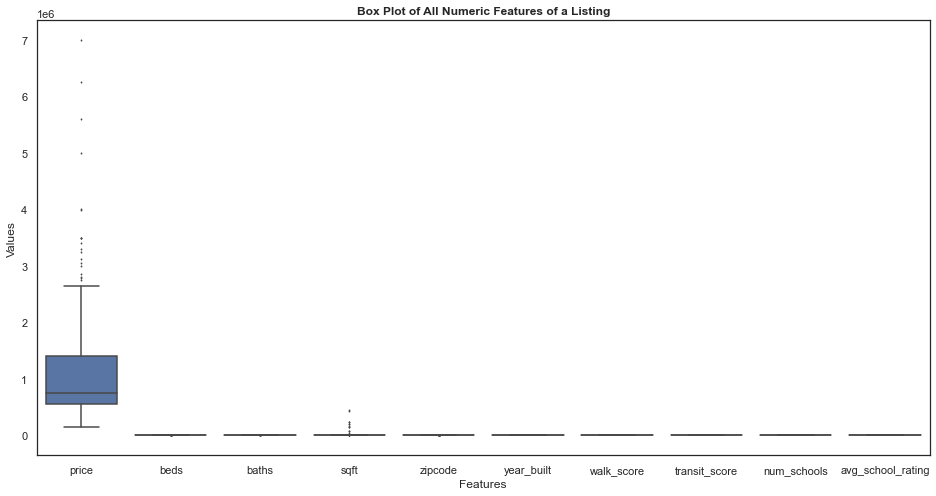

In [780]:
sns.set(rc={"figure.figsize": (16, 8)})
sns.set_style("white")
boxplot_house = sns.boxplot(data=house_df,fliersize = 1)
boxplot_house.set_ylabel('Values')
boxplot_house.set_xlabel('Features')
boxplot_house.set_title("Box Plot of All Numeric Features of a Listing", fontsize = 12,fontweight="bold",loc='center');

It seems like the target column (price) presents some outliers. Let's investigate.

In [781]:
house_df['price'].describe()

count    1.920000e+02
mean     1.174238e+06
std      1.097535e+06
min      1.450000e+05
25%      5.496750e+05
50%      7.500000e+05
75%      1.399250e+06
max      6.995000e+06
Name: price, dtype: float64

In [788]:
# Define quartiles
price_q3 = np.quantile(house_df['price'], 0.75)
price_q1 = np.quantile(house_df['price'], 0.25)
print(price_q1,price_q3)

549675.0 1399250.0


In [784]:
price_outliers = house_df[house_df['price']>price_q3]

In [785]:
price_outliers

,url,price,beds,baths,sqft,zipcode,property_type,year_built,walk_score,transit_score,parking,pool,city_view,water_view,park_view,mountain_view,num_schools,avg_school_rating,address,listing_id
295,edetails/845-W-End-Ave-APT-4F-New-York-NY-1002...,2600000.0,3.0,3.0,1634.0,10025,Condo,1926,98,100,0 spaces,No,No,No,No,No,3,3.000000,845-W-End-Ave-APT-4F-New-York-NY-10025,117451325
369,edetails/77-Park-Ter-E-APT-D35-New-York-NY-100...,1625000.0,2.0,2.0,1200.0,10016,Apartment,2002,98,100,0 spaces,No,No,No,No,No,3,6.666667,77-Park-Ter-E-APT-D35-New-York-NY-10034,80624971
234,edetails/750-Kappock-St-APT-306-Bronx-NY-10463...,2150000.0,4.0,5.0,3584.0,10471,SingleFamily,2015,33,63,No Data,No,No,No,No,No,2,7.500000,750-Kappock-St-APT-306-Bronx-NY-10463,244449963
384,edetails/728-41st-St-APT-4F-Brooklyn-NY-11232/...,1550000.0,3.0,2.0,1265.0,11215,Condo,2020,99,100,0 spaces,No,No,No,No,No,3,7.333333,728-41st-St-APT-4F-Brooklyn-NY-11232,216113585
629,edetails/721-5th-Ave-62M-New-York-NY-10022/207...,2200000.0,1.0,2.0,1201.0,10022,Condo,1983,97,100,0 spaces,No,No,No,No,No,3,7.333333,721-5th-Ave-62M-New-York-NY-10022,2071168945
619,edetails/71-Bleecker-St-5W-New-York-NY-10012/2...,3295000.0,4.0,3.0,3000.0,10012,Cooperative,1900,99,100,0 spaces,No,No,No,No,No,3,6.000000,71-Bleecker-St-5W-New-York-NY-10012,2071168949
98,edetails/681-Union-St-APT-A-Brooklyn-NY-11215/...,2275000.0,3.0,4.0,1641.0,11217,Condo,2020,99,100,0 spaces,No,No,No,No,No,3,6.333333,681-Union-St-APT-A-Brooklyn-NY-11215,245016406
315,edetails/64-E-1st-St-4-New-York-NY-10003/24477...,2995000.0,2.0,3.0,1807.0,10003,Condo,2015,100,100,0 spaces,No,No,No,No,No,2,7.500000,64-E-1st-St-4-New-York-NY-10003,244773829
515,edetails/580-Carroll-St-1A-Brooklyn-NY-11215/1...,1925000.0,2.0,2.0,1212.0,11215,Condo,2009,99,100,Garage - Attached,No,No,No,No,No,2,9.000000,580-Carroll-St-1A-Brooklyn-NY-11215,145588170
135,edetails/575-Ocean-Ave-2EE-Brooklyn-NY-11226/2...,1400000.0,9.0,3.0,2814.0,11212,MultiFamily,2007,88,100,0 spaces,No,No,No,No,No,2,3.500000,575-Ocean-Ave-2EE-Brooklyn-NY-11226,2071115459


In [791]:
price_outliers['price'].max()

6995000.0

This dataframe only includes 192 observations, which does not meet the commonly accepted threshold for significance. This analysis is only preliminary as I keep scraping data. <br \>
By analyzing the price_outliers mas well as the max value of the column price, I realize that a value of ~ USD7m is completely acceptable for a market like NYC. Therefore the observations carrying these high values in the price do not need to be removed. I will repeat the diagnistics for outliers once all the observations have been included in the dataframe.

### Check for zeros

In [796]:
# Double check data types
house_df.dtypes

url                   object
price                float64
beds                 float64
baths                float64
sqft                 float64
zipcode                int64
property_type         object
year_built             int64
walk_score             int64
transit_score          int64
parking               object
pool                  object
city_view             object
water_view            object
park_view             object
mountain_view         object
num_schools            int64
avg_school_rating    float64
address               object
listing_id            object
dtype: object

In [798]:
# Mask for all records for which price is equal to 0
price_zeros = (house_df['price'] == 0)
price_zeros.value_counts()

False    192
Name: price, dtype: int64

There is no observation for which price is zero.

In [803]:
# Check if there is any zero in the dataframe
0 in house_df.values

False

In [804]:
# Confirm with this method since the method above doesn't work for floats with 0 value
house_df.isin([0]).any().any()

False

There is no observation presenting a 0 value in any column of the dataframe.

## Pickle dataframe - Scraping Iteration #1

I will pickle the dataframe so I can work on it in another notebook while this notebook runs the scraping.

In [807]:
# Store df in pickle object
house_df.to_pickle('house_df.pickle')

## Scrape all html files in a loop - Iteration #2

In [903]:
# Create a list of names of the html files saved locally
html_list_2 = []

for i in range(300,3550):
    html_list_2.append('house_'+str(i)+'.html')

In [931]:
len(html_list_2)

3250

In [935]:
# Create a list of dictionaries from the locally stored html
house_dictionary_list_2 = []

def get_all_dict_2(final_html_list):    
    for i in range(300,len(final_html_list)+1):
        try:
            html_path = '/Users/valentinarizzati/Desktop/html_raw_2/'+str(final_html_list[i])
            current_house_dict = get_house_dict(html_path)
            house_dictionary_list_2.append(current_house_dict)
            time.sleep(1)
            #time.sleep(random.uniform(3, 5))
        except:
            i = i+1
            
    return house_dictionary_list_2

In [944]:
scrape_2 = get_all_dict_2(html_list_2)

In [945]:
len(scrape_2)

875

In [933]:
scrape_3 = get_all_dict_2(html_list_2)

In [934]:
len(scrape_3)

875

In [946]:
scrape_4 = scrape_2+scrape_3

In [947]:
len(scrape_4)

1750

## Reshape data into a pd dataframe - Iteration #2

In [1026]:
# Create dataframe based on the information retrieved from the html stored locally
house_df_2 = pd.DataFrame(scrape_4) 
house_df_2

,url,price,beds,baths,sqft,zipcode,property_type,year_built,walk_score,transit_score,parking,pool,city_view,water_view,park_view,mountain_view,num_schools,avg_school_rating
0,/homedetails/49-E-86th-St-12C-New-York-NY-1002...,1850000.0,2.0,3.0,86553.0,10028,Cooperative,1930,99,100,0 spaces,No,No,No,No,No,3,7.333333
1,/homedetails/2-River-Ter-APT-14N-New-York-NY-1...,3650000.0,3.0,3.0,1580.0,10282,Condo,2006,96,100,"Garage - Attached,",Yes,No,No,No,No,3,8.333333
2,/homedetails/611-W-56th-St-4D-New-York-NY-1001...,997500.0,1.0,1.0,509.0,10019,Condo,2021,95,100,0 spaces,No,No,No,No,No,3,6.000000
3,/homedetails/23-W-116th-St-APT-3D-New-York-NY-...,1225000.0,2.0,2.0,1046.0,10026,Condo,2014,96,100,0 spaces,No,No,No,No,No,2,4.500000
4,/homedetails/2-E-118th-St-New-York-NY-10035/31...,2200000.0,8.0,4.0,3600.0,10035,Townhouse,2000,98,100,0 spaces,No,No,No,No,No,3,3.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1745,/homedetails/54-Riverside-Dr-APT-9D-New-York-N...,1995000.0,2.0,3.0,147001.0,10024,Cooperative,1926,97,100,0 spaces,No,No,No,No,No,1,9.000000
1746,/homedetails/617-W-End-Ave-15A-New-York-NY-100...,1695000.0,2.0,1.0,1200.0,10024,Cooperative,1925,99,100,0 spaces,No,No,No,No,No,3,2.666667
1747,/homedetails/117-Beekman-St-4B-New-York-NY-100...,1225000.0,1.0,1.0,1075.0,10038,Condo,1908,100,100,None,No,No,No,No,No,2,8.500000
1748,/homedetails/353-E-104th-St-APT-3B-New-York-NY...,565000.0,1.0,1.0,695.0,10029,Condo,2007,95,100,0 spaces,No,No,No,No,No,3,6.666667


In [1027]:
house_df_2['url'].value_counts()

https://www.zillow.com/homedetails/2724-Tenbroeck-Ave-Bronx-NY-10469/29823255_zpid/          46
https://www.zillow.com/homedetails/11-Twin-Oak-Dr-Staten-Island-NY-10304/32293201_zpid/      38
https://www.zillow.com/homedetails/20-Seacrest-Ave-Staten-Island-NY-10312/32349529_zpid/     30
https://www.zillow.com/homedetails/64-E-86th-St-APT-4C-New-York-NY-10028/72530681_zpid/      24
https://www.zillow.com/homedetails/821-Dekalb-Ave-1-Brooklyn-NY-11221/244990266_zpid/        24
                                                                                             ..
https://www.zillow.com/homedetails/45-Martense-St-APT-5H-Brooklyn-NY-11226/80390135_zpid/     2
/homedetails/1383-Plimpton-Ave-APT-5C-Bronx-NY-10452/2086712739_zpid/                         2
/homedetails/759-E-10th-St-APT-2A-Brooklyn-NY-11230/84075822_zpid/                            2
/homedetails/52-Santa-Monica-Ln-Staten-Island-NY-10309/68319264_zpid/                         2
/homedetails/131-Devoe-St-4A-Brooklyn-NY

In [1021]:
# Create function to standardize url
def standardize_url(url):
    if url[0] == 'h':
        url_1 = url.split('/')
        new_url = url_1[3:]
        std_url = '/'.join(new_url)
    else:
        std_url = url[1:]
    return std_url

In [1028]:
# Standardize url
house_df_2['url'] = house_df_2['url'].apply(standardize_url)

In [1029]:
house_df_2['url'].value_counts()

homedetails/2724-Tenbroeck-Ave-Bronx-NY-10469/29823255_zpid/                 46
homedetails/11-Twin-Oak-Dr-Staten-Island-NY-10304/32293201_zpid/             38
homedetails/20-Seacrest-Ave-Staten-Island-NY-10312/32349529_zpid/            30
homedetails/64-E-86th-St-APT-4C-New-York-NY-10028/72530681_zpid/             24
homedetails/821-Dekalb-Ave-1-Brooklyn-NY-11221/244990266_zpid/               24
                                                                             ..
homedetails/36-Hamilton-Ave-APT-6G-Staten-Island-NY-10301/217911520_zpid/     2
homedetails/277-Washington-Ave-APT-6A-Brooklyn-NY-11205/82381037_zpid/        2
homedetails/2077-E-29th-St-Brooklyn-NY-11229/30743818_zpid/                   2
homedetails/2-W-End-Ave-4-Brooklyn-NY-11235/2103357265_zpid/                  2
homedetails/59-Edgewater-Park-B-Bronx-NY-10465/2071348268_zpid/               2
Name: url, Length: 668, dtype: int64

In [1030]:
# Extract address column
house_df_2['address'] = house_df_2['url'].str.split('/').str[-3]

In [1031]:
house_df_2['address'].value_counts()

2724-Tenbroeck-Ave-Bronx-NY-10469              46
11-Twin-Oak-Dr-Staten-Island-NY-10304          38
20-Seacrest-Ave-Staten-Island-NY-10312         30
821-Dekalb-Ave-1-Brooklyn-NY-11221             24
64-E-86th-St-APT-4C-New-York-NY-10028          24
                                               ..
800-Grand-Concourse-2O-Bronx-NY-10451           2
3368-Shore-Pkwy-7B-Brooklyn-NY-11235            2
1501-Metropolitan-Ave-APT-9B-Bronx-NY-10462     2
104-E-37th-St-APT-2C-New-York-NY-10016          2
52-Forest-Ln-Staten-Island-NY-10307             2
Name: address, Length: 667, dtype: int64

In [1032]:
def strip_listing_id_2(url):
    split_url = url.split('/')
    listing_id_full = split_url[-2].split('_')
    return listing_id_full[0]

In [1033]:
# Extract listing id
house_df_2['listing_id'] = house_df_2['url'].apply(strip_listing_id_2)

In [1034]:
house_df_2['listing_id'].value_counts()

29823255      46
32293201      38
32349529      30
72530681      24
244990266     24
              ..
32276623       2
79489728       2
29799189       2
2071109523     2
79711469       2
Name: listing_id, Length: 668, dtype: int64

In [1035]:
house_df_2.head(2)

,url,price,beds,baths,sqft,zipcode,property_type,year_built,walk_score,transit_score,parking,pool,city_view,water_view,park_view,mountain_view,num_schools,avg_school_rating,address,listing_id
0,homedetails/49-E-86th-St-12C-New-York-NY-10028...,1850000.0,2.0,3.0,86553.0,10028,Cooperative,1930,99,100,0 spaces,No,No,No,No,No,3,7.333333,49-E-86th-St-12C-New-York-NY-10028,244703584
1,homedetails/2-River-Ter-APT-14N-New-York-NY-10...,3650000.0,3.0,3.0,1580.0,10282,Condo,2006,96,100,"Garage - Attached,",Yes,No,No,No,No,3,8.333333,2-River-Ter-APT-14N-New-York-NY-10282,2094637426


### Check for duplicates

In [1037]:
# Drop duplicates
house_df_2.sort_values(["url"], inplace=True, ascending=False)
house_df_2.drop_duplicates(subset=["url"], inplace=True)

In [1038]:
house_df_2['url'].value_counts()

homedetails/617-W-End-Ave-15A-New-York-NY-10024/244888853_zpid/        1
homedetails/657-E-26th-St-APT-4V-Brooklyn-NY-11210/245039033_zpid/     1
homedetails/1372-Shakespeare-Ave-4D-Bronx-NY-10452/2071539489_zpid/    1
homedetails/2012-Watson-Ave-Bronx-NY-10472/29796573_zpid/              1
homedetails/104-Duer-Ave-Staten-Island-NY-10305/32322900_zpid/         1
                                                                      ..
homedetails/6-W-20th-St-FLOOR-4-New-York-NY-10011/2077918398_zpid/     1
homedetails/2-River-Ter-APT-14N-New-York-NY-10282/2094637426_zpid/     1
homedetails/261-W-25th-St-APT-8B-New-York-NY-10001/219650849_zpid/     1
homedetails/4315-Webster-Ave-APT-4M-Bronx-NY-10470/244465343_zpid/     1
homedetails/59-Edgewater-Park-B-Bronx-NY-10465/2071348268_zpid/        1
Name: url, Length: 668, dtype: int64

In [1039]:
house_df_2.shape

(668, 20)

In [1041]:
# Check #1 that listing_id are unique
house_df_2['listing_id'].value_counts().sum()

668

In [1044]:
# Check #2 that listing_id are unique
unique_id = len(pd.unique(house_df_2['listing_id']))

In [1045]:
unique_id

668

### Check for missing values

In [1046]:
house_df_2.isna().sum()

url                  0
price                0
beds                 0
baths                0
sqft                 0
zipcode              0
property_type        0
year_built           0
walk_score           0
transit_score        0
parking              0
pool                 0
city_view            0
water_view           0
park_view            0
mountain_view        0
num_schools          0
avg_school_rating    8
address              0
listing_id           0
dtype: int64

In [1047]:
# Create a mask for null data
null_data_2 = house_df_2[house_df_2.isnull().any(axis=1)]

In [1053]:
null_data_2

,url,price,beds,baths,sqft,zipcode,property_type,year_built,walk_score,transit_score,parking,pool,city_view,water_view,park_view,mountain_view,num_schools,avg_school_rating,address,listing_id
515,homedetails/856-43rd-St-APT-12-Brooklyn-NY-112...,630000.0,2.0,1.0,800.0,11232,Cooperative,1922,93,85,None,No,No,No,No,No,2,NaN,856-43rd-St-APT-12-Brooklyn-NY-11232,79489728
1387,homedetails/762-41st-St-APT-4D-Brooklyn-NY-112...,669000.0,2.0,2.0,867.0,11232,Apartment,2011,90,91,0 spaces,No,No,No,No,No,2,NaN,762-41st-St-APT-4D-Brooklyn-NY-11232,112079642
520,homedetails/712-45th-St-APT-2A-Brooklyn-NY-112...,650000.0,3.0,1.0,900.0,11220,Cooperative,1924,94,93,0 spaces,No,No,No,No,No,2,NaN,712-45th-St-APT-2A-Brooklyn-NY-11220,245015854
492,homedetails/4610-6th-Ave-APT-1F-Brooklyn-NY-11...,499000.0,2.0,1.0,537.0,11220,Condominium,1930,94,95,0 spaces,No,No,No,No,No,1,NaN,4610-6th-Ave-APT-1F-Brooklyn-NY-11220,83043370
1463,homedetails/317-S-5th-St-APT-4-Brooklyn-NY-112...,799000.0,2.0,1.0,640.0,11211,Condo,1915,99,100,0 spaces,No,No,No,No,No,3,NaN,317-S-5th-St-APT-4-Brooklyn-NY-11211,2098761526
653,homedetails/2341-Arthur-Kill-Rd-Staten-Island-...,599000.0,2.0,2.0,1356.0,10309,Single Family - Detached,1899,39,39,"No Garage, On Street",No,No,No,No,No,0,NaN,2341-Arthur-Kill-Rd-Staten-Island-NY-10309,32373405
1527,homedetails/2181-Belmont-Ave-Bronx-NY-10457/94...,685000.0,6.0,2.0,2152.0,10457,Single Family Residence,2010,96,94,"None, On Street",No,No,No,No,No,2,NaN,2181-Belmont-Ave-Bronx-NY-10457,94715753
1639,homedetails/2112-Hughes-Ave-Bronx-NY-10457/297...,895000.0,9.0,3.0,2904.0,10457,MultiFamily,1925,94,95,0 spaces,No,No,No,No,No,2,NaN,2112-Hughes-Ave-Bronx-NY-10457,29784843


In [1052]:
# Retrieve the url so we can check them individually
null_data_2['url'].tolist()

['homedetails/856-43rd-St-APT-12-Brooklyn-NY-11232/79489728_zpid/',
 'homedetails/762-41st-St-APT-4D-Brooklyn-NY-11232/112079642_zpid/',
 'homedetails/712-45th-St-APT-2A-Brooklyn-NY-11220/245015854_zpid/',
 'homedetails/4610-6th-Ave-APT-1F-Brooklyn-NY-11220/83043370_zpid/',
 'homedetails/317-S-5th-St-APT-4-Brooklyn-NY-11211/2098761526_zpid/',
 'homedetails/2341-Arthur-Kill-Rd-Staten-Island-NY-10309/32373405_zpid/',
 'homedetails/2181-Belmont-Ave-Bronx-NY-10457/94715753_zpid/',
 'homedetails/2112-Hughes-Ave-Bronx-NY-10457/29784843_zpid/']

In [1057]:
# Listing id 79489728: one of the schools has a rating of 6 and the other has a rating of NaN. I will impute 6 in the avg_school_rating column.
house_df_2.loc[house_df_2.listing_id == '79489728', 'avg_school_rating'] = 6

In [1058]:
# Listing id 112079642: one of the schools has a rating of 6 and the other has a rating of NaN. I will impute 6 in the avg_school_rating column.
house_df_2.loc[house_df_2.listing_id == '112079642', 'avg_school_rating'] = 6

In [1059]:
# Listing id 245015854: one of the schools has a rating of 6 and the other has a rating of NaN. I will impute 6 in the avg_school_rating column.
house_df_2.loc[house_df_2.listing_id == '245015854', 'avg_school_rating'] = 6

In [1060]:
# Listing id 83043370: it has only one school with no rating. Given the location of the property in a neighbourhood with relatively low density vs NY standards, I will impute 0.
house_df_2.loc[house_df_2.listing_id == '83043370', 'avg_school_rating'] = 0

In [1061]:
# Listing id 2098761526: one of the schools has a rating of 5 and the other has a rating of 2. I will impute 3.5 in the avg_school_rating column.
house_df_2.loc[house_df_2.listing_id == '2098761526', 'avg_school_rating'] = 3.5

In [1062]:
# Listing id 32373405: it has only one school with no rating. Given the location of the property in a neighbourhood with relatively low density vs NY standards, I will impute 0.
house_df_2.loc[house_df_2.listing_id == '32373405', 'avg_school_rating'] = 0

In [1063]:
# Listing id 94715753: one of the schools has a rating of 7 and the other has a rating of NaN. I will impute 7 in the avg_school_rating column.
house_df_2.loc[house_df_2.listing_id == '94715753', 'avg_school_rating'] = 7

In [1064]:
# Listing id 29784843: one of the schools has a rating of 7 and the other has a rating of NaN. I will impute 7 in the avg_school_rating column.
house_df_2.loc[house_df_2.listing_id == '29784843', 'avg_school_rating'] = 7

In [1065]:
house_df_2.isna().sum()

url                  0
price                0
beds                 0
baths                0
sqft                 0
zipcode              0
property_type        0
year_built           0
walk_score           0
transit_score        0
parking              0
pool                 0
city_view            0
water_view           0
park_view            0
mountain_view        0
num_schools          0
avg_school_rating    0
address              0
listing_id           0
dtype: int64

In [1066]:
house_df_2.shape

(668, 20)

### Check for outliers

In [766]:
house_df_2

,url,price,beds,baths,sqft,zipcode,property_type,year_built,walk_score,transit_score,parking,pool,city_view,water_view,park_view,mountain_view,num_schools,avg_school_rating,address,listing_id
625,edetails/96-Cuba-Ave-Staten-Island-NY-10306/32...,578000.0,3.0,2.0,1170.0,10306,Single Family - Semi-Attached,1965,67,63,"No Garage, Off Street",No,No,No,No,No,3,5.000000,96-Cuba-Ave-Staten-Island-NY-10306,32334694
434,edetails/943-Wheeler-Ave-Bronx-NY-10473/297933...,485000.0,1.0,1.0,598.0,10451,Condo,2018,94,100,None,No,No,No,No,No,2,6.000000,943-Wheeler-Ave-Bronx-NY-10473,29793328
259,edetails/912-Quincy-Ave-Bronx-NY-10465/2984769...,829000.0,6.0,4.0,3087.0,10462,Multi Family,1899,92,93,Off Street,No,No,No,No,No,3,4.000000,912-Quincy-Ave-Bronx-NY-10465,29847699
609,edetails/903-E-214th-St-Bronx-NY-10469/1426756...,825000.0,6.0,5.0,2080.0,10469,Multi Family,2003,81,89,"Attached, 1 Car Attached, Driveway",No,No,No,No,No,3,4.333333,903-E-214th-St-Bronx-NY-10469,142675618
97,edetails/90-10-Hollis-Ct-Queens-Village-NY-114...,939000.0,3.0,2.0,1500.0,11004,Single Family Residence,1955,78,52,"Attached, 1 Car Attached, Driveway, Off Street",Yes,No,No,No,No,3,6.333333,90-10-Hollis-Ct-Queens-Village-NY-11428,2071221858
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,edetails/1035-5th-Ave-9D-New-York-NY-10028/244...,2650000.0,2.0,2.0,233923.0,10028,Cooperative,1928,98,100,0 spaces,No,No,No,No,No,3,7.333333,1035-5th-Ave-9D-New-York-NY-10028,244747845
621,edetails/1025-Vincent-Ave-Bronx-NY-10465/29845...,565000.0,3.0,2.0,1636.0,10465,Single Family Residence,1955,84,62,"Attached, 1 Car Attached, Driveway",No,No,No,No,No,3,5.666667,1025-Vincent-Ave-Bronx-NY-10465,29845700
412,edetails/100-W-72nd-St-APT-2F-New-York-NY-1002...,1175000.0,3.0,2.0,1350.0,10016,Cooperative,1900,99,100,0 spaces,No,No,No,No,No,3,6.333333,100-W-72nd-St-APT-2F-New-York-NY-10023,244772652
156,edetails/10-Bay-Street-Lndg-APT-8I-Staten-Isla...,540000.0,2.0,2.0,1590.0,10301,Apartment,1982,88,79,"No Garage, Assigned",No,No,No,No,No,3,3.333333,10-Bay-Street-Lndg-APT-8I-Staten-Island-NY-10301,2088712539


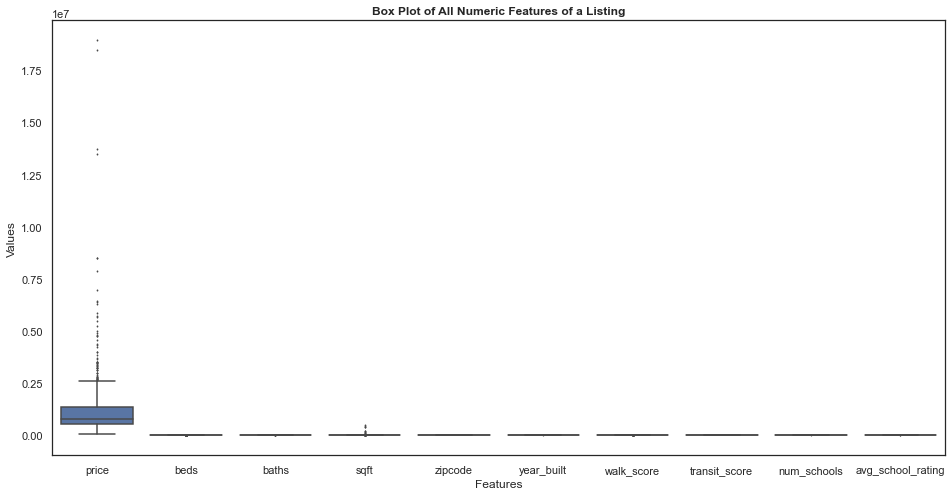

In [1081]:
# Create boxplot to identify outliers
sns.set(rc={"figure.figsize": (16, 8)})
sns.set_style("white")
boxplot_house_2 = sns.boxplot(data=house_df_2,fliersize = 1)
boxplot_house_2.set_ylabel('Values')
boxplot_house_2.set_xlabel('Features')
boxplot_house_2.set_title("Box Plot of All Numeric Features of a Listing", fontsize = 12,fontweight="bold",loc='center');

It seems like the target column (price) presents some outliers. Let's investigate.

In [1068]:
house_df_2['price'].describe()

count    6.680000e+02
mean     1.269908e+06
std      1.639844e+06
min      6.000000e+04
25%      5.637492e+05
50%      7.990000e+05
75%      1.383750e+06
max      1.895000e+07
Name: price, dtype: float64

In [1069]:
# Define quartiles
price_q3_2 = np.quantile(house_df_2['price'], 0.75)
price_q1_2 = np.quantile(house_df_2['price'], 0.25)
print(price_q1_2,price_q3_2)

563749.25 1383750.0


In [1070]:
price_outliers_2 = house_df_2[house_df_2['price']>price_q3_2]

In [1075]:
price_outliers_2

,url,price,beds,baths,sqft,zipcode,property_type,year_built,walk_score,transit_score,parking,pool,city_view,water_view,park_view,mountain_view,num_schools,avg_school_rating,address,listing_id
540,homedetails/9935-Shore-Rd-APT-7B-Brooklyn-NY-1...,2399000.0,3.0,2.0,1655.0,11209,Condo,2004,88,82,0 spaces,No,No,No,No,No,2,6.000000,9935-Shore-Rd-APT-7B-Brooklyn-NY-11209,64697773
480,homedetails/98-Luquer-St-Brooklyn-NY-11231/207...,2500000.0,2.0,4.0,1347.0,11201,Condo,2019,99,100,0 spaces,Yes,No,No,No,No,2,5.000000,98-Luquer-St-Brooklyn-NY-11231,2071063223
1578,homedetails/98-Front-St-PENTHOUSE-1C-Brooklyn-...,2195000.0,2.0,2.0,1101.0,11201,Condo,2019,99,100,0 spaces,Yes,No,No,No,No,2,5.000000,98-Front-St-PENTHOUSE-1C-Brooklyn-NY-11201,2071137389
1315,homedetails/98-Front-St-GRB-Brooklyn-NY-11201/...,3250000.0,2.0,4.0,1728.0,11201,Condo,2019,99,100,0 spaces,Yes,No,No,No,No,2,5.000000,98-Front-St-GRB-Brooklyn-NY-11201,2071143215
1274,homedetails/965-5th-Ave-APT-5A-New-York-NY-100...,3500000.0,2.0,3.0,113150.0,10021,Cooperative,1938,97,100,0 spaces,No,No,No,No,No,3,6.333333,965-5th-Ave-APT-5A-New-York-NY-10021,244757842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1257,homedetails/101-W-14th-St-8A-New-York-NY-10011...,2500000.0,2.0,2.0,942.0,10011,Condo,2020,100,100,0 spaces,No,No,No,No,No,3,7.000000,101-W-14th-St-8A-New-York-NY-10011,2071192120
862,homedetails/101-W-14th-St-4D-New-York-NY-10011...,3350000.0,2.0,2.0,1454.0,10011,Condo,2020,100,100,0 spaces,No,No,No,No,No,3,7.000000,101-W-14th-St-4D-New-York-NY-10011,2071192119
1744,homedetails/1001-Park-Ave-12S-New-York-NY-1002...,3500000.0,3.0,3.0,68569.0,10028,Cooperative,1928,99,100,0 spaces,No,No,No,No,No,3,7.333333,1001-Park-Ave-12S-New-York-NY-10028,321913843
347,homedetails/100-Pilling-St-Brooklyn-NY-11207/3...,1988000.0,6.0,4.0,4240.0,11207,MultiFamily,1905,81,100,0 spaces,No,No,No,No,No,2,5.500000,100-Pilling-St-Brooklyn-NY-11207,30631179


In [1072]:
price_outliers_2['price'].max()

18950000.0

The price columns displays some outliers. I will keep them in the model now and then reassess the situation later when I merge this df to the one created from the first scraping.

### Check for zeros

In [1076]:
# Double check data types
house_df_2.dtypes

url                   object
price                float64
beds                 float64
baths                float64
sqft                 float64
zipcode                int64
property_type         object
year_built             int64
walk_score             int64
transit_score          int64
parking               object
pool                  object
city_view             object
water_view            object
park_view             object
mountain_view         object
num_schools            int64
avg_school_rating    float64
address               object
listing_id            object
dtype: object

In [1077]:
# Mask for all records for which price is equal to 0
price_zeros_2 = (house_df_2['price'] == 0)
price_zeros_2.value_counts()

False    668
Name: price, dtype: int64

There is no observation for which price is zero.

## Pickle dataframe - Iteration #2

In [1080]:
# Store df in pickle object
house_df_2.to_pickle('house_df_2.pickle')